# Exploratory Data Analysis

### The Libraries

In this part I will import the libraries that may be of assistance in this portion of the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from scipy import stats
import random

### The Data

In this part I will be loading the datasets created during the datawrangling  portion of the project.

In [2]:
# The Original DataFrame
df = pd.read_csv("Original_DataFrame.csv", index_col = ['Year', 'Stock'])

# The DataFrame which includes the indicators to be used for the continuation of the project
indicators = pd.read_csv("Indicators.csv", index_col = ['Year', 'Stock'])

In [3]:
df.head()

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Year Stock                                                                
2014 PG     7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
     KR     9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
     RAD    2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
     GIS    1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
     PM     8.010600e+10          0.0010     6.077500e+10  1.933100e+10   

            R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
Year Stock                                                                     
2014 PG              0.0  2.146100e+10        2.146100e+10      1.391000e+10   
     KR              0.0  1.519600e+10        1.751200e+10      2.725000e+09   
     RAD             0.0  6.561162e+09        6.586482e+09      7.372520e+08   
     GIS             0.0  3.474300e+09        3.412400e+09      2.957400e+09   
     PM              0.0  7.001000e+09        7.629000e+09      1.170200e+10   

            Interest Expense  Earnings before Tax  ...              Sector  \
Year Stock                                         ...                       
2014 PG         7.090000e+08         1.449400e+10  ...  Consumer Defensive   
     KR         4.430000e+08         2.270000e+09  ...  Consumer Defensive   
     RAD        4.245910e+08         2.502180e+08  ...  Consumer Defensive   
     GIS        3.024000e+08         2.707700e+09  ...  Consumer Defensive   
     PM         1.052000e+09         1.059000e+10  ...  Consumer Defensive   

            PRICE VAR [%]  Class  Return on Assets  Current Ratio  \
Year Stock                                                          
2014 PG         -9.323276      0          0.080705       0.937467   
     KR         33.118297      1          0.051877       0.824848   
     RAD         2.752291      1          0.035913       1.708956   
     GIS        12.897715      1          0.078822       0.810086   
     PM         13.980937      1          0.212948       1.024616   

            Quick Ratio  Cash Ratio  Cash Flow to Debt Ratio  \
Year Stock                                                     
2014 PG        0.506197    0.253751                 0.394105   
     KR        0.141709    0.037459                 0.315915   
     RAD       0.436885    0.058388                 0.121943   
     GIS       0.433465    0.159915                 0.289217   
     PM        0.447922    0.111302                 0.262740   

            Price Earnings to Growth Ratio  Dividend Payout Ratio  
Year Stock                                                         
2014 PG                         505.568733              -0.593576  
     KR                         208.923611              -0.210007  
     RAD                         31.208356               0.000000  
     GIS                       1335.957143              -0.538972  
     PM                        -179.929548              -0.805418  

[5 rows x 133 columns]

In [4]:
indicators.head()

Return on Assets  Return on Equity  Profit Margin  Current Ratio  \
Year Stock                                                                     
2014 PG             0.080705            0.1664          0.156       0.937467   
     KR             0.051877            0.2821          0.015       0.824848   
     RAD            0.035913           -0.1180          0.008       1.708956   
     GIS            0.078822            0.2792          0.102       0.810086   
     PM             0.212948           -0.5933          0.094       1.024616   

            Quick Ratio  Cash Ratio  Debt Ratio  Debt to Equity Ratio  \
Year Stock                                                              
2014 PG        0.506197    0.253751      0.2455                0.5061   
     KR        0.141709    0.037459      0.3863                2.1007   
     RAD       0.436885    0.058388      0.8290               -2.7237   
     GIS       0.433465    0.159915      0.3796                1.3445   
     PM        0.447922    0.111302      0.8371               -2.3323   

            Interest Coverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                              ...   
2014 PG               21.4429                 0.394105  ...   
     KR                6.1242                 0.315915  ...   
     RAD               1.5893                 0.121943  ...   
     GIS               9.9540                 0.289217  ...   
     PM               11.0665                 0.262740  ...   

            Price Earnings to Growth Ratio  Price to Sales Ratio  \
Year Stock                                                         
2014 PG                         505.568733                2.8583   
     KR                         208.923611                0.1858   
     RAD                         31.208356                0.2491   
     GIS                       1335.957143                1.8610   
     PM                        -179.929548                1.5798   

            Dividend Yield  Dividend Payout Ratio  Asset Turnover Ratio  \
Year Stock                                                                
2014 PG             0.0311              -0.593576              0.515721   
     KR             0.0174              -0.210007              3.359687   
     RAD            0.0000               0.000000              3.675578   
     GIS            0.0286              -0.538972              0.773777   
     PM             0.0476              -0.805418              2.276579   

            Inventory Turnover Ratio  Receivables Turnover  PRICE VAR [%]  \
Year Stock                                                                  
2014 PG                      10.8869               11.5404      -9.323276   
     KR                      18.2227               90.7937      33.118297   
     RAD                      8.3030               27.1769       2.752291   
     GIS                     11.5363               12.2250      12.897715   
     PM                       8.6892               20.3910      13.980937   

                        Sector Class  
Year Stock                            
2014 PG     Consumer Defensive     0  
     KR     Consumer Defensive     1  
     RAD    Consumer Defensive     1  
     GIS    Consumer Defensive     1  
     PM     Consumer Defensive     1  

[5 rows x 21 columns]

This part of the project will use statistics to gather more information about the dataset to ensure the quality of the next stage, the machine learning phase.

With that said, I will begin this part by checking the current statistics of the data using the describe method.

In [5]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,17246.0,-0.038189,0.369143,-9.008607e+00,-0.021940,0.020396,0.061926,2.458629e+01
Return on Equity,17246.0,998.061239,91011.115067,-3.477246e+04,-0.055675,0.073300,0.145300,1.114114e+07
Profit Margin,17246.0,-8.828075,240.096486,-2.441400e+04,-0.039000,0.042000,0.125000,9.400410e+02
Current Ratio,17246.0,inf,NaN,-9.618164e-01,1.036685,1.780654,3.087974,inf
Quick Ratio,17246.0,inf,NaN,-1.116182e+00,0.975932,1.416475,2.801549,inf
Cash Ratio,17246.0,inf,NaN,-1.927361e-01,0.135979,0.434858,1.123418,inf
Debt Ratio,17246.0,0.253650,0.286623,-4.536000e-01,0.042000,0.206000,0.387775,8.319900e+00
Debt to Equity Ratio,17246.0,0.616150,28.103075,-2.586436e+03,0.037825,0.466900,1.095450,2.131513e+03
Interest Coverage,17246.0,4.865251,3399.094109,-1.214976e+05,0.000000,1.409800,7.194325,3.612074e+05
Cash Flow to Debt Ratio,17246.0,NaN,NaN,-inf,0.060321,0.229849,0.664869,inf


The describe method revealed some issues that would definitely impact the quality of the machine learning algorithm.  The issue at hand is the fact that some features contain either a minimum value of negative infinity, a maximum value of positive infinity, or both.

I will now investigate each of those columns and begin fixing the issue.

My first step will be to check how many of the currant ratio, quick ratio, and cash ratio features contains a value of positive infinity.

In [6]:
# Checking how many of the Current Ratio data contains the positive infinity value. 
(indicators['Current Ratio'] == indicators['Current Ratio'].max()).sum()

7

In [7]:
# Checking how many of the Quick Ratio data contains the positive infinity value. 
(indicators['Quick Ratio'] == indicators['Quick Ratio'].max()).sum()

7

In [8]:
# Checking how many of the Cash Ratio data contains the positive infinity value.
(indicators['Cash Ratio'] == indicators['Cash Ratio'].max()).sum()

7

Since all 3 of them only have 7 stocks that have values of positive infinity, I will eliminate them to avoid any future issues.  It is unrealistic to have those ratios as positive infinity so droping them is the best course of action. 

To drop them I will first save their index (stocks) into a variable.

In [9]:
# Identifying the stocks index with current ratio value of positive infinity
current_ratio_inf_max = indicators.loc[indicators['Current Ratio'] == indicators['Current Ratio'].max(),:].index
current_ratio_inf_max

MultiIndex([(2014,   'GPL'),
            (2014,  'FRPH'),
            (2015,   'GPL'),
            (2015,  'CSWC'),
            (2016, 'MARPS'),
            (2017, 'MARPS'),
            (2018, 'MARPS')],
           names=['Year', 'Stock'])

In [10]:
# Identifying the stocks index with quick ratio value of positive infinity
quick_ratio_inf_max = indicators.loc[indicators['Quick Ratio'] == indicators['Quick Ratio'].max(),:].index
quick_ratio_inf_max

MultiIndex([(2014,   'GPL'),
            (2014,  'FRPH'),
            (2015,   'GPL'),
            (2015,  'CSWC'),
            (2016, 'MARPS'),
            (2017, 'MARPS'),
            (2018, 'MARPS')],
           names=['Year', 'Stock'])

In [11]:
# Identifying the stocks index with cash ratio value of positive infinity
cash_ratio_inf_max = indicators.loc[indicators['Cash Ratio'] == indicators['Cash Ratio'].max(),:].index
cash_ratio_inf_max

MultiIndex([(2014,   'GPL'),
            (2014,  'FRPH'),
            (2015,   'GPL'),
            (2015,  'CSWC'),
            (2016, 'MARPS'),
            (2017, 'MARPS'),
            (2018, 'MARPS')],
           names=['Year', 'Stock'])

In [12]:
# Checking equality between the current_ratio_inf_max and the quick_ratio_inf_max
current_ratio_inf_max == quick_ratio_inf_max

array([ True,  True,  True,  True,  True,  True,  True])

In [13]:
# Checking equality between the current_ratio_inf_max and the cash_ratio_inf_max
current_ratio_inf_max == cash_ratio_inf_max

array([ True,  True,  True,  True,  True,  True,  True])

Luckily the 7 stocks that are causing the max value for those features to be positive infinity are exactly the same 7 stocks for all three of them.  The reason for that is because those features were engineered by having the Total Current Liabilities as the denominator of the ratio and on those 7 cases the Total Current Liabilities has a value of 0 (zero).

Now I will drop those stocks in place.  Since they are all the same, I only need to drop one set of them to solve the problem of all three features.

In [14]:
indicators.drop(cash_ratio_inf_max, inplace = True)

Now let's check the data again and see how much of a change did the previous steps caused.

In [15]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,17239.0,-0.038386,0.368668,-9.008607e+00,-0.021936,0.020389,0.061911,2.458629e+01
Return on Equity,17239.0,998.466323,91029.589849,-3.477246e+04,-0.055650,0.073300,0.145250,1.114114e+07
Profit Margin,17239.0,-8.832098,240.145144,-2.441400e+04,-0.039000,0.042000,0.125000,9.400410e+02
Current Ratio,17239.0,3.172486,12.315878,-9.618164e-01,1.036202,1.780020,3.085756,1.348252e+03
Quick Ratio,17239.0,3.928270,22.167068,-1.116182e+00,0.975687,1.416097,2.798792,1.474982e+03
Cash Ratio,17239.0,1.222615,3.505869,-1.927361e-01,0.135882,0.434523,1.122258,1.535504e+02
Debt Ratio,17239.0,0.253743,0.286642,-4.536000e-01,0.042050,0.206000,0.387850,8.319900e+00
Debt to Equity Ratio,17239.0,0.616385,28.108778,-2.586436e+03,0.038100,0.467200,1.095650,2.131513e+03
Interest Coverage,17239.0,4.900816,3399.781697,-1.214976e+05,0.000000,1.411200,7.195300,3.612074e+05
Cash Flow to Debt Ratio,17239.0,NaN,NaN,-inf,0.060307,0.229665,0.664363,inf


There are less infinity values now.  I will now do a similar process to the dividend payout ratio minimum value and the price earnings to growth ratio maximum value.

I will start by checking how many of the stocks have a price earnings to growth ratio of negative infinity.

In [16]:
# Identifying the stocks with diciden payout ratio of negative infinity
(indicators['Dividend Payout Ratio'] == indicators['Dividend Payout Ratio'].min()).sum()

2

Only 2 stocks have a dividend payout ratio of negative infinity.  That makes the decision to eliminate those stocks easy.

In [17]:
# Identifying the stocks with a negative infinity dividend payout ratio
dividend_payout_ratio_ninf_min = indicators.loc[indicators['Dividend Payout Ratio'] == 
                                                indicators['Dividend Payout Ratio'].min(),:].index

# Eliminating the stocks with a negative infinity dividend payout ratio
indicators.drop(dividend_payout_ratio_ninf_min, inplace = True)

Let me check the changes after the last drops.

In [18]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,17237.0,-0.038391,0.368689,-9.008607e+00,-0.021944,0.020396,0.061913,2.458629e+01
Return on Equity,17237.0,998.582174,91034.870424,-3.477246e+04,-0.055700,0.073300,0.145300,1.114114e+07
Profit Margin,17237.0,-8.833123,240.159058,-2.441400e+04,-0.039000,0.042000,0.125000,9.400410e+02
Current Ratio,17237.0,3.172757,12.316567,-9.618164e-01,1.036683,1.780124,3.086073,1.348252e+03
Quick Ratio,17237.0,3.928512,22.168343,-1.116182e+00,0.975651,1.416018,2.798862,1.474982e+03
Cash Ratio,17237.0,1.222741,3.506053,-1.927361e-01,0.135842,0.434635,1.122323,1.535504e+02
Debt Ratio,17237.0,0.253746,0.286658,-4.536000e-01,0.042000,0.206000,0.387900,8.319900e+00
Debt to Equity Ratio,17237.0,0.616372,28.110408,-2.586436e+03,0.038100,0.467200,1.095700,2.131513e+03
Interest Coverage,17237.0,4.901137,3399.978940,-1.214976e+05,0.000000,1.410300,7.195300,3.612074e+05
Cash Flow to Debt Ratio,17237.0,NaN,NaN,-inf,0.060300,0.229695,0.664384,inf


I will now check how many stocks have value of positive infinity for the price earnings to growth ratio feature.

In [19]:
# Checking how many stocks have a price earnings to growth ratio value of positive infinity
(indicators['Price Earnings to Growth Ratio'] == indicators['Price Earnings to Growth Ratio'].max()).sum()

136

The stocks with a maximum price earnings to growth ratio of positive infinity will be droped as well.  Though there are quite a bit more of them than there were with the previous features, 136 will not make a major impact given the total amount of data there is.

In [20]:
# Identifying the stocks with the positive infinity price earnings to growth ratio
peg_inf_max = indicators.loc[indicators['Price Earnings to Growth Ratio'] == 
                                                indicators['Price Earnings to Growth Ratio'].max(),:].index

# Eliminating the stocks with the positive infinity price earnings to growth ratio
indicators.drop(peg_inf_max, inplace = True)

Now to once again checking the impact of the last changes on the statistics of the data.

In [21]:
indicators.describe().T

,count,mean,std,min,25%,50%,75%,max
Return on Assets,17101.0,-0.039110,0.369978,-9.008607e+00,-0.023196,0.020229,0.061913,2.458629e+01
Return on Equity,17101.0,1006.524556,91396.119756,-3.477246e+04,-0.057600,0.073200,0.145400,1.114114e+07
Profit Margin,17101.0,-8.904599,241.110841,-2.441400e+04,-0.040500,0.042000,0.124000,9.400410e+02
Current Ratio,17101.0,3.174333,12.358653,-9.618164e-01,1.037793,1.779962,3.085439,1.348252e+03
Quick Ratio,17101.0,3.927533,22.237455,-1.116182e+00,0.974304,1.414241,2.800543,1.474982e+03
Cash Ratio,17101.0,1.224127,3.516979,-1.927361e-01,0.136051,0.434523,1.121187,1.535504e+02
Debt Ratio,17101.0,0.253687,0.286899,-4.536000e-01,0.042000,0.206100,0.388100,8.319900e+00
Debt to Equity Ratio,17101.0,0.630361,28.149953,-2.586436e+03,0.038100,0.466900,1.097000,2.131513e+03
Interest Coverage,17101.0,4.867758,3413.471726,-1.214976e+05,0.000000,1.394400,7.194100,3.612074e+05
Cash Flow to Debt Ratio,17101.0,NaN,NaN,-inf,0.059548,0.229569,0.664109,inf


Now the only problem that I have with the data is the Cash Flow to Debt Ratio which is giving me a range of negative infinity to positive infinity.  Let me check how many of each is in the data.

In [22]:
# Checking how many stocks have a cash flow to debt ratio value of positive infinity
(indicators['Cash Flow to Debt Ratio'] == indicators['Cash Flow to Debt Ratio'].max()).sum()

1688

In [23]:
# Checking how many stocks have a cash flow to debt ratio value of negative infinity
(indicators['Cash Flow to Debt Ratio'] == indicators['Cash Flow to Debt Ratio'].min()).sum()

1061

There a total of 2749 stocks that have cash flow to debt ratio values of either negative or positive infinity.  Since this is a ratio, I assume the reason for an infinity value is because of a zero in the denominator, in this case a zero value for the total debt column in the original dataset.  To be sure of it, I will have to check the total debt column for those stocks.

Let me now isolate the stocks that contains a cash flow to debt ratio of positive infinity.

In [24]:
# Listing the stocks with the positive infinity values in the cash flow to debt ratio feature
cfd = list(indicators.loc[indicators['Cash Flow to Debt Ratio'] == indicators['Cash Flow to Debt Ratio'].max(),:].index)

I will do the same with the stocks that has a cash flow to debt ratio of negative infinity.

In [25]:
# Appending the stocks with the negatibe infinity values in the cash flow to debt ratio to the previously created list
for i in indicators.loc[indicators['Cash Flow to Debt Ratio'] == indicators['Cash Flow to Debt Ratio'].min(),:].index:
    cfd.append(i)

Now let me check the total debt for those stocks.

In [26]:
# Having a look at the total debt values for the stocks in the cfd list
df.loc[cfd]['Total debt']

Year  Stock
2014  TAL      0.0
      MNST     0.0
      CHGG     0.0
      EDU      0.0
      PETS     0.0
              ... 
2018  SMSI     0.0
      SPRO     0.0
      SRTS     0.0
      UNAM     0.0
      XBIO     0.0
Name: Total debt, Length: 2749, dtype: float64

In [27]:
# Ensuring the total sum of the total debt values for the stocks in the cfd list adds up to zero
(df.loc[cfd]['Total debt']).sum()

0.0

Having zero debt is not necessarily a good thing for a company.  It is quite unusual for a company to have zero total debt because companies usually have a line of credit to use with with suppliers for example or to finance their growth.  When a company has zero debt it means that that company does not finance increased operations through borrowing.  This would normally turn investors away since the company is not realizing its potential for growth.

Before moving on, I will check how those stocks are divided according to the class column.

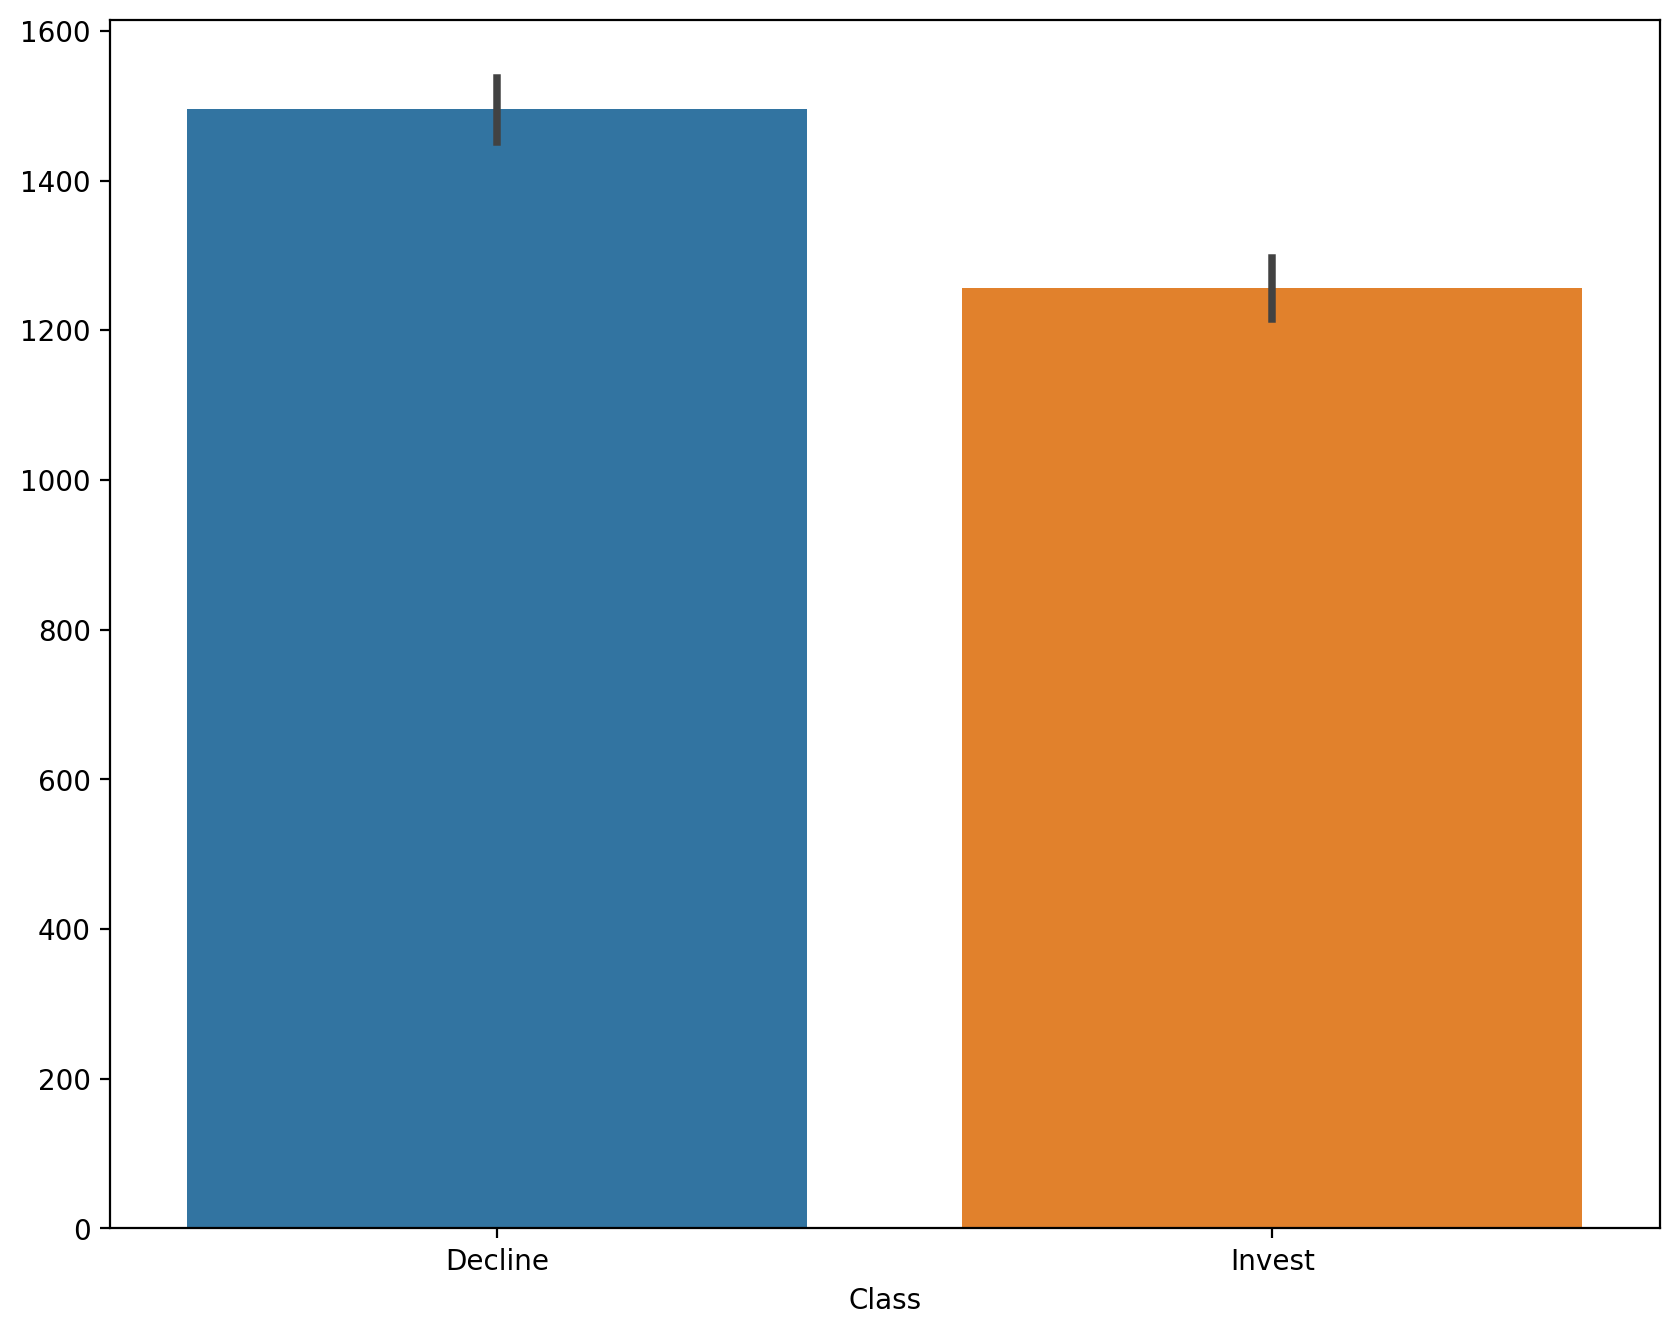

In [28]:
# Creating a barplot
fig, ax = plt.subplots(figsize = (10, 8), dpi = 200)

ax = sns.barplot(y = np.arange(len(df.loc[cfd])), x = 'Class', data = df.loc[cfd])

ax.set_xticklabels(['Decline', 'Invest'])

plt.show()

The barplot shows that the number of invest and decline are almost identical in the those datasets.

Now let me check how the class would be divided once those stocks are removed.

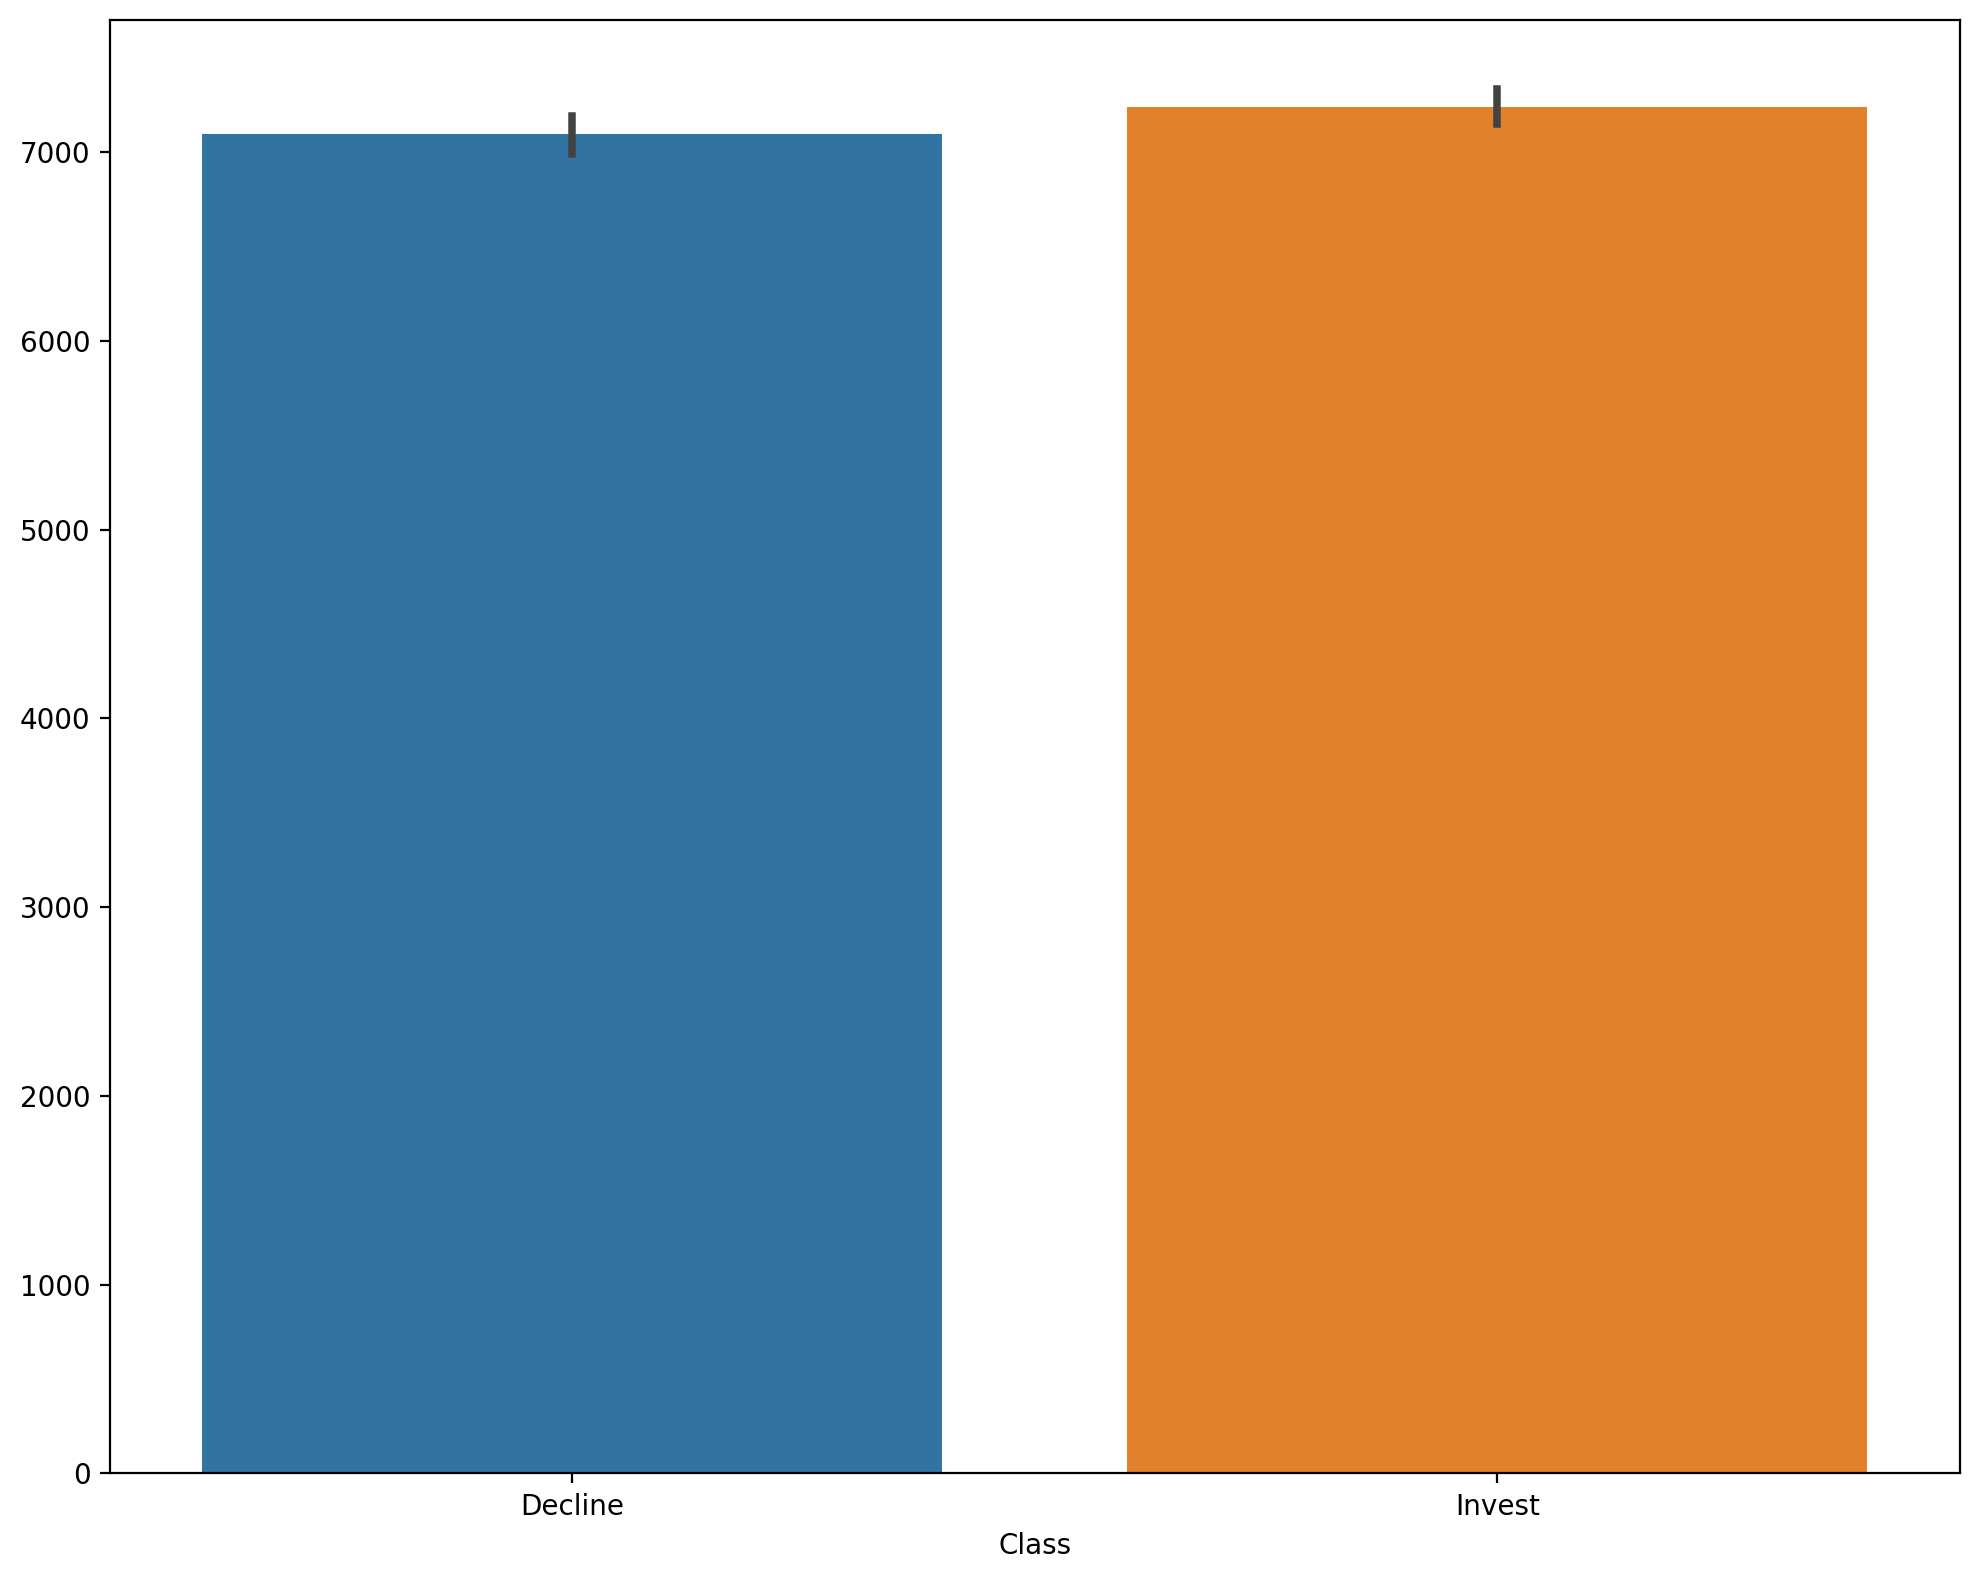

In [29]:
fig, ax = plt.subplots(figsize = (10, 8), dpi = 200)
ax = sns.barplot(y = np.arange(len(indicators.drop(cfd))), x = 'Class', data = indicators.drop(cfd))
ax.set_xticklabels(['Decline', 'Invest'])
fig.tight_layout()
plt.show()

Though 2749 stocks will be taken out, the class column will have nearly identical amounts of both invest and decline.  That means that the dataset will not have a bias either way so there is nearly no impact from droping the stocks with zero total debt.

Now I will drop the data with zero total debt.

In [30]:
# Dropping the stocks
indicators.drop(cfd, inplace = True)

Since most of the features are ratios, it is normal to see both minimum and maximum values so low.  Grapphical models will show some of the features, when observed by the class, will have different statistics.

The first example of the different statistics shown graphically will be by using a boxplot to show the price variance distribution.

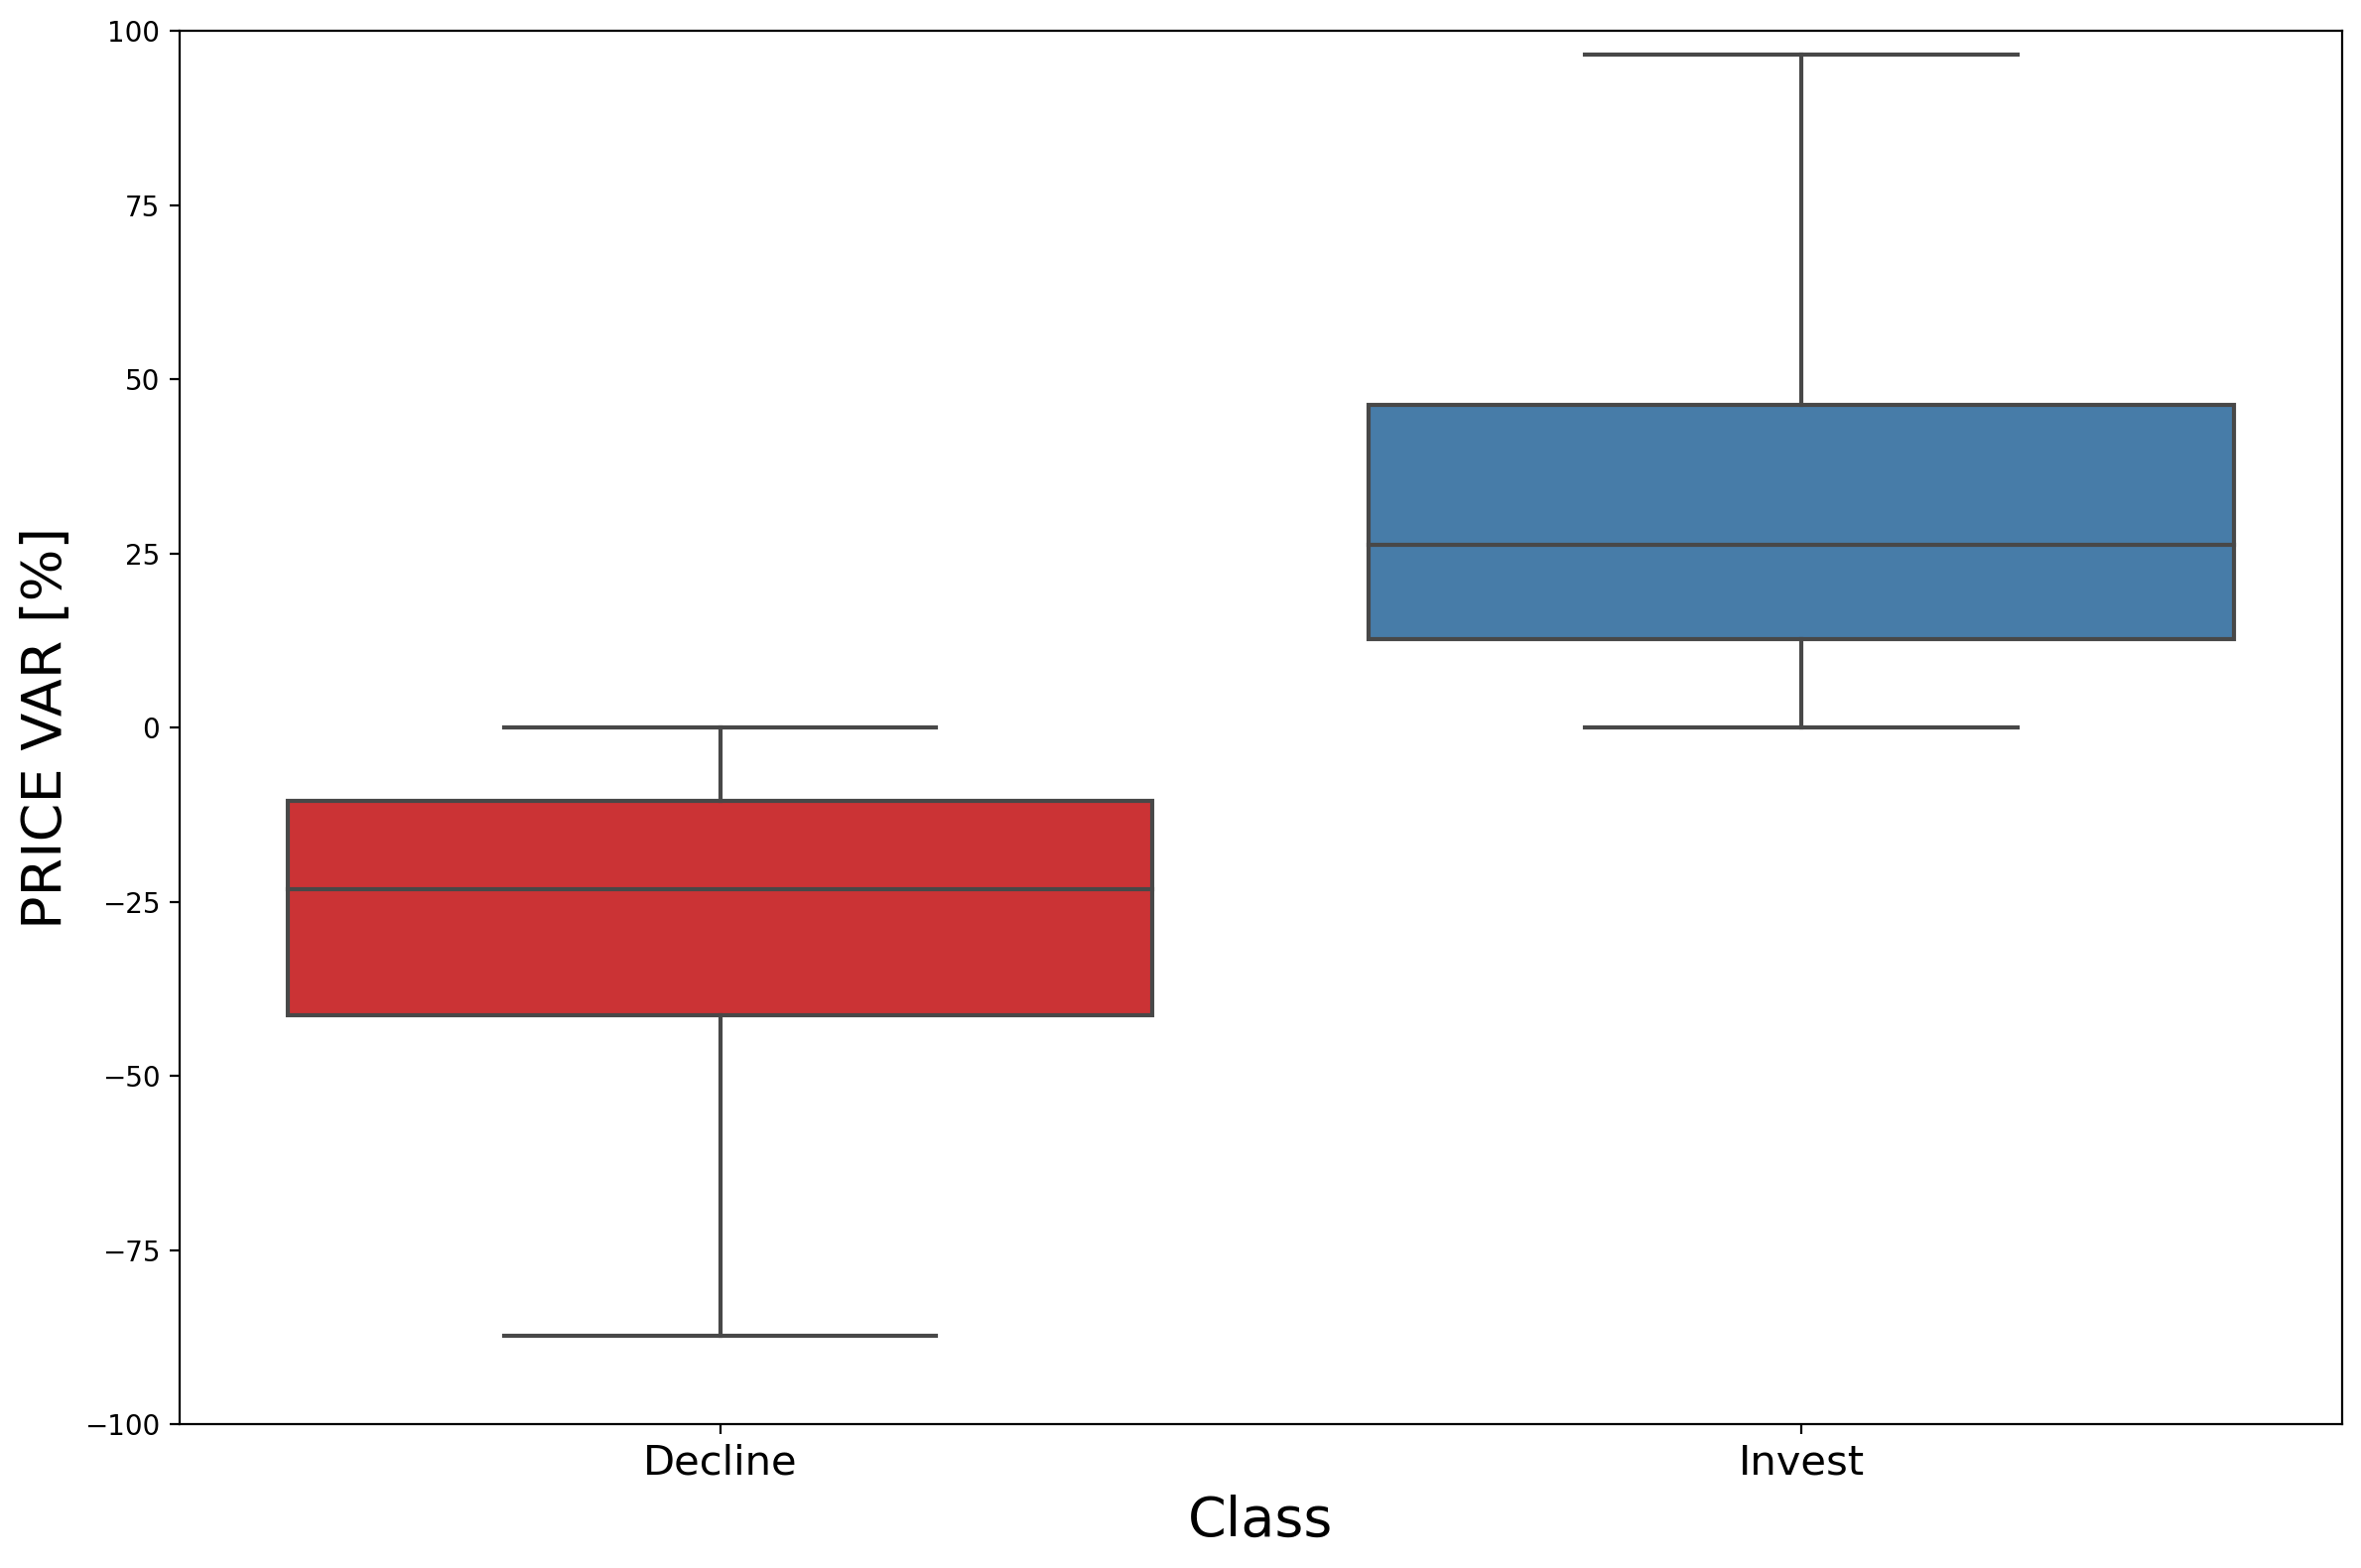

In [31]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)

ax = sns.boxplot(x = 'Class',
                 y = 'PRICE VAR [%]',
                 data = indicators,
                 showfliers = False,
                 palette = 'Set1')


ax.set_xticklabels(['Decline', 'Invest'], fontsize = 15)
plt.ylim(-100, 100)
plt.xlabel('Class', size = 20)
plt.ylabel('PRICE VAR [%]', size = 20)


plt.tight_layout()
plt.show()

The boxplot above shows some very clear differences in the distribution of the price variance with very difference medians.  The decline data is mostly concentrated below zero while the invest data is concentrated in the positive values.  This type of separation is expected since this is the feature that dictates the invest or decline decisions of the study.  Invest on a positive price variance and decline a negative.

Now I will take a look at the price earnings ratio using a density chart.

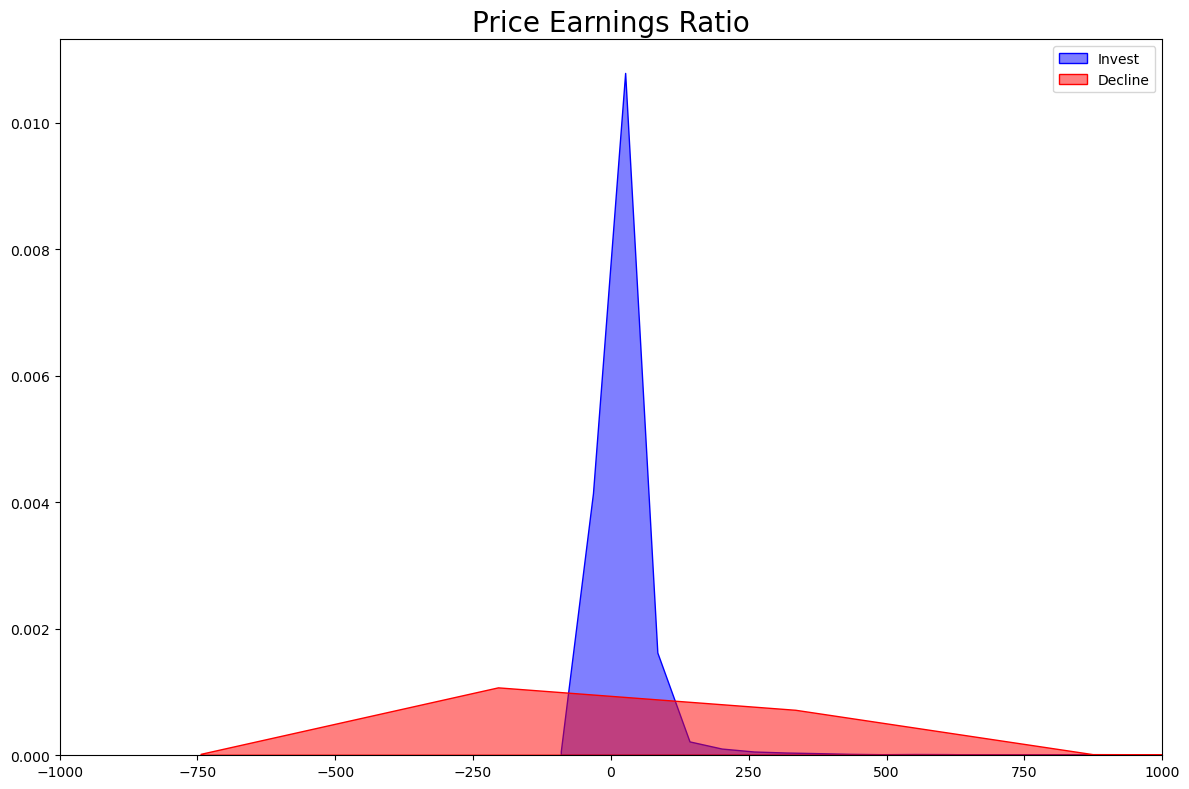

In [32]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 1]['Price Earnings Ratio'],
            shade=True, label = 'Invest',
            color = 'blue',
            alpha = 0.5)
sns.kdeplot(indicators[indicators.Class == 0]['Price Earnings Ratio'],
            shade=True, label = 'Decline',
            color = 'red',
            alpha = 0.5)

plt.xlabel(None)
plt.ylabel(None)
plt.xlim(-1000, 1000)
plt.legend()
plt.title('Price Earnings Ratio', size = 20)

plt.tight_layout()
plt.show()

As we can see from the graph above, the price earnings ratio from the invest class is a narrow spike while the decline class is more spread.  That signifies the difference in the variance and standard deviation.

Some of the features do not demonstrate such clear differences between them such as the cash ratio, debt ratio and the asset turnover ratio. For those features I will use hypothesis tests to further analyse possible differences between the invest and the decline classes.

#### Cash Ratio Hypothesis Test

Before I start the hypothesis test, I will take a look at the distribution graphically with both a boxplot and a density graph.

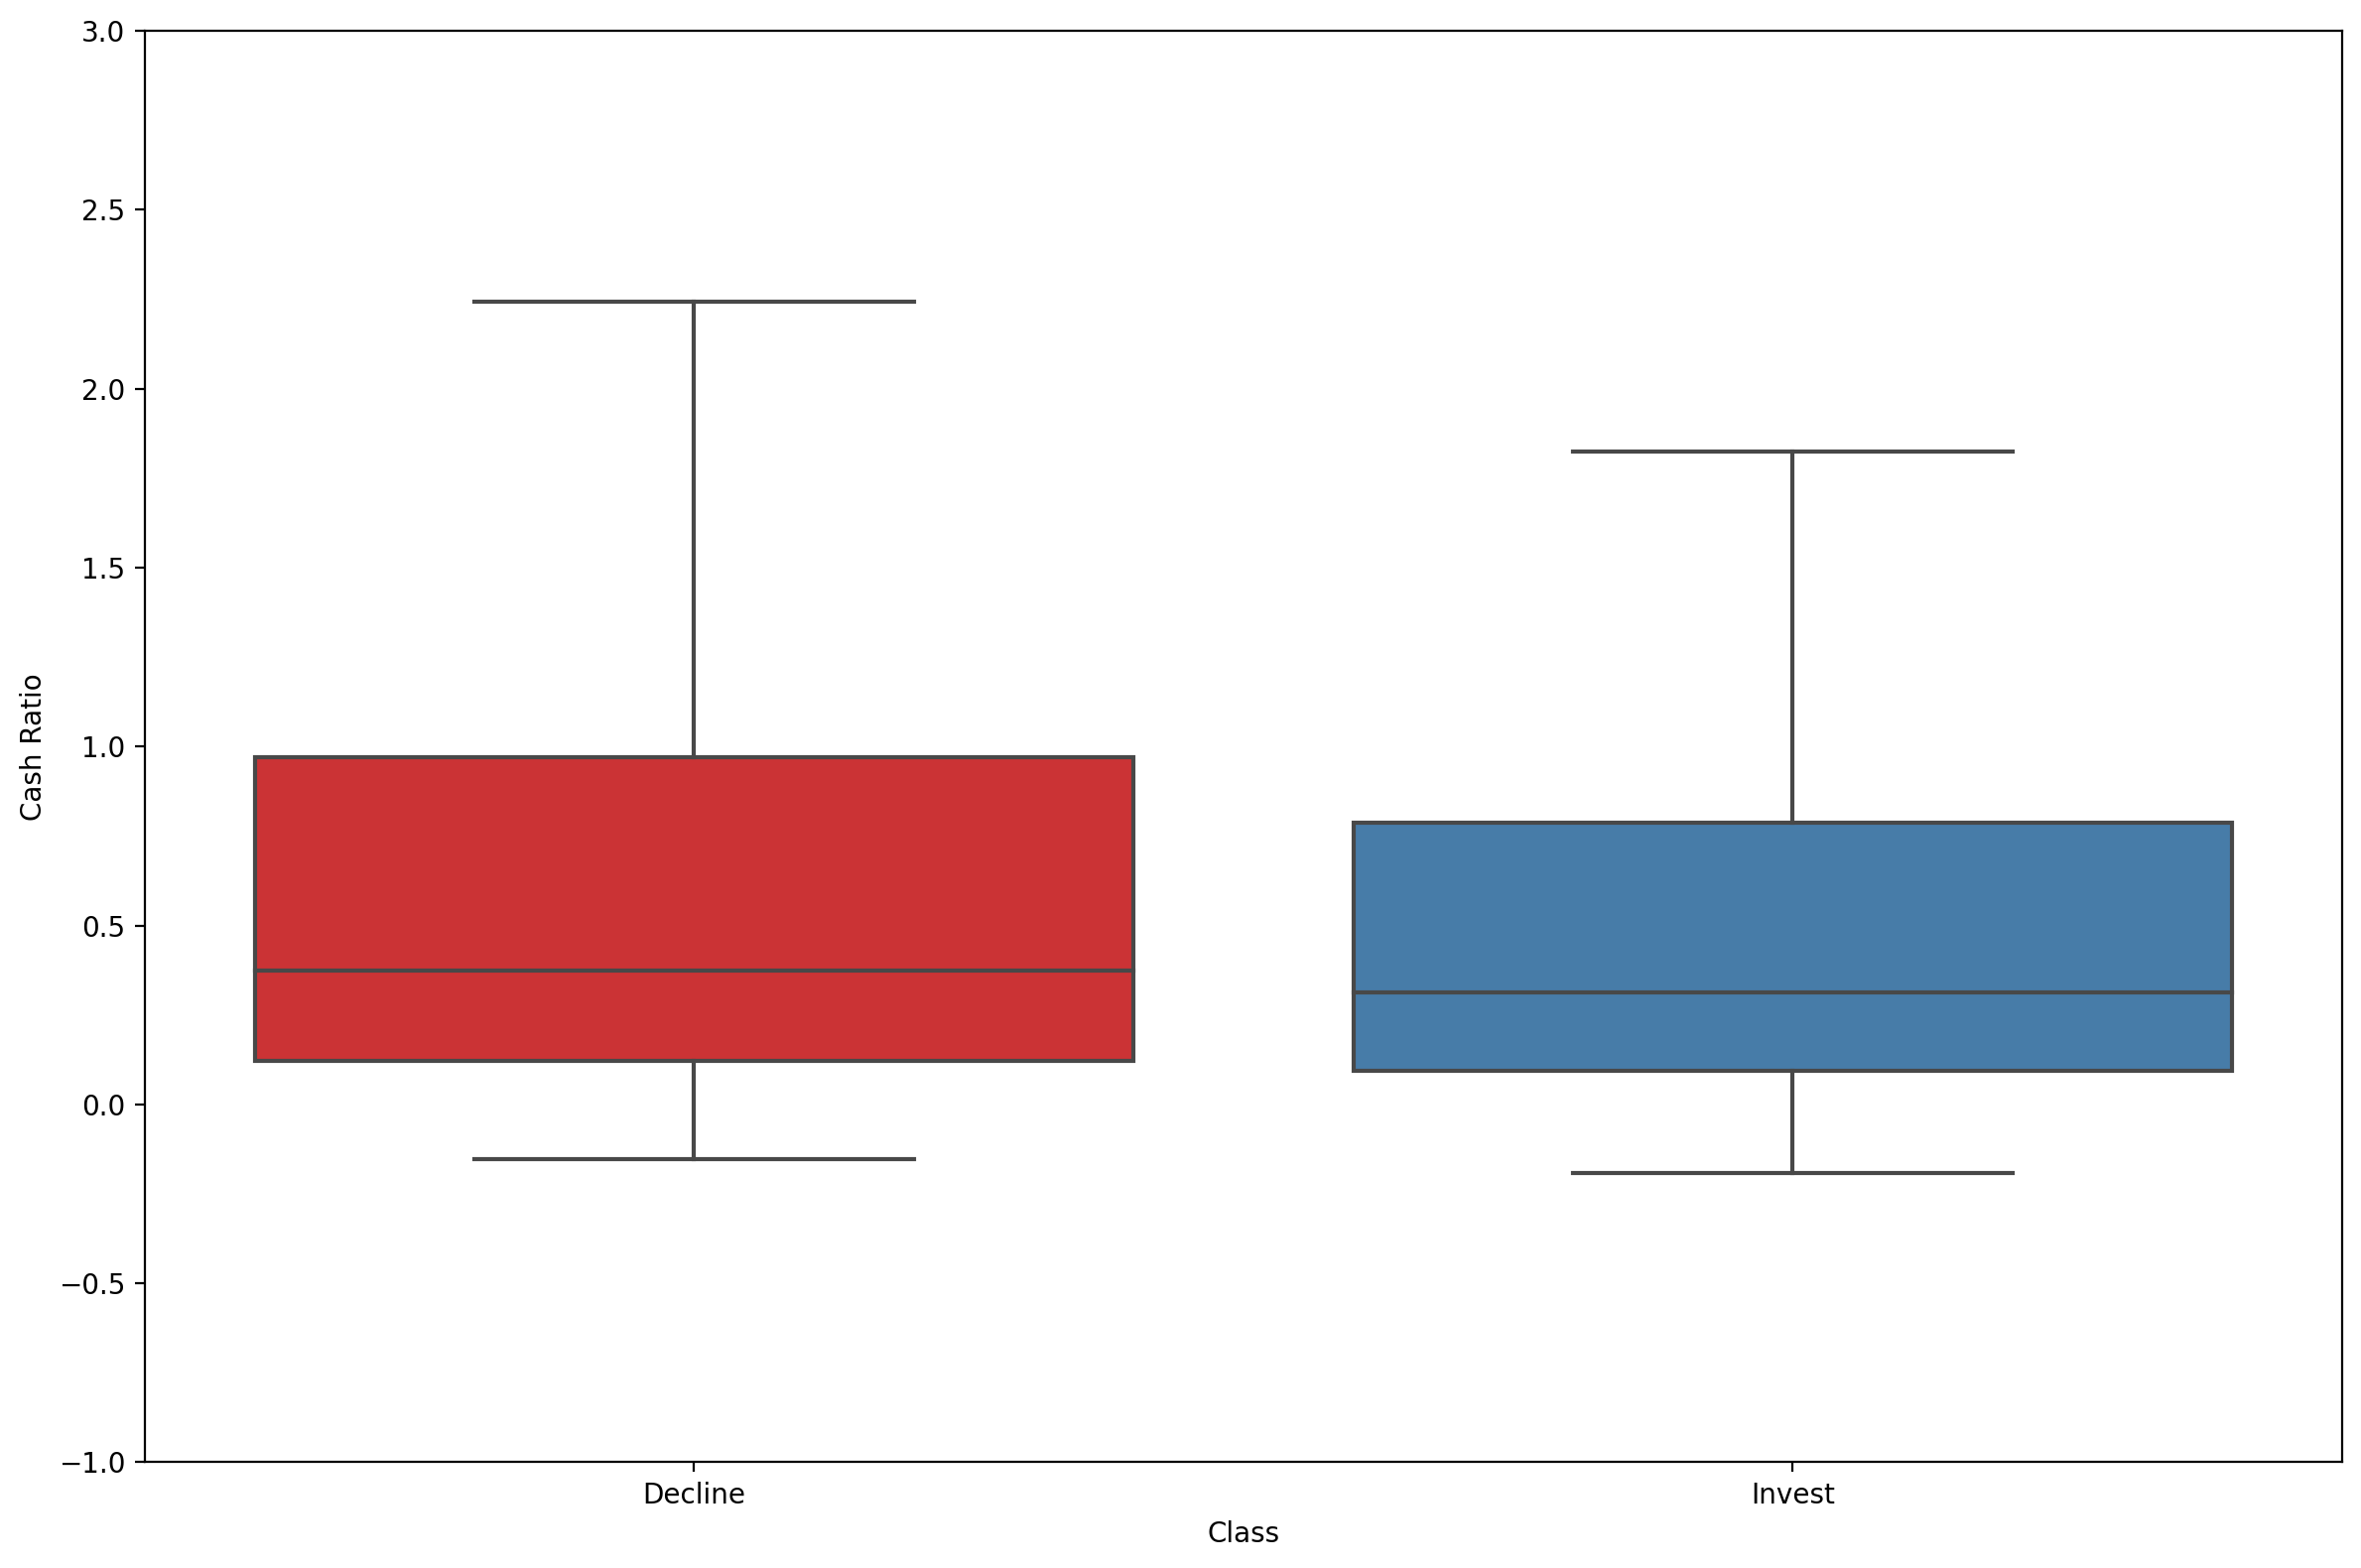

In [33]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)

ax = sns.boxplot(x = 'Class',
                 y = 'Cash Ratio',
                 data = indicators,
                 showfliers = False,
                 palette = 'Set1')

ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1, 3)

plt.tight_layout()
plt.show()

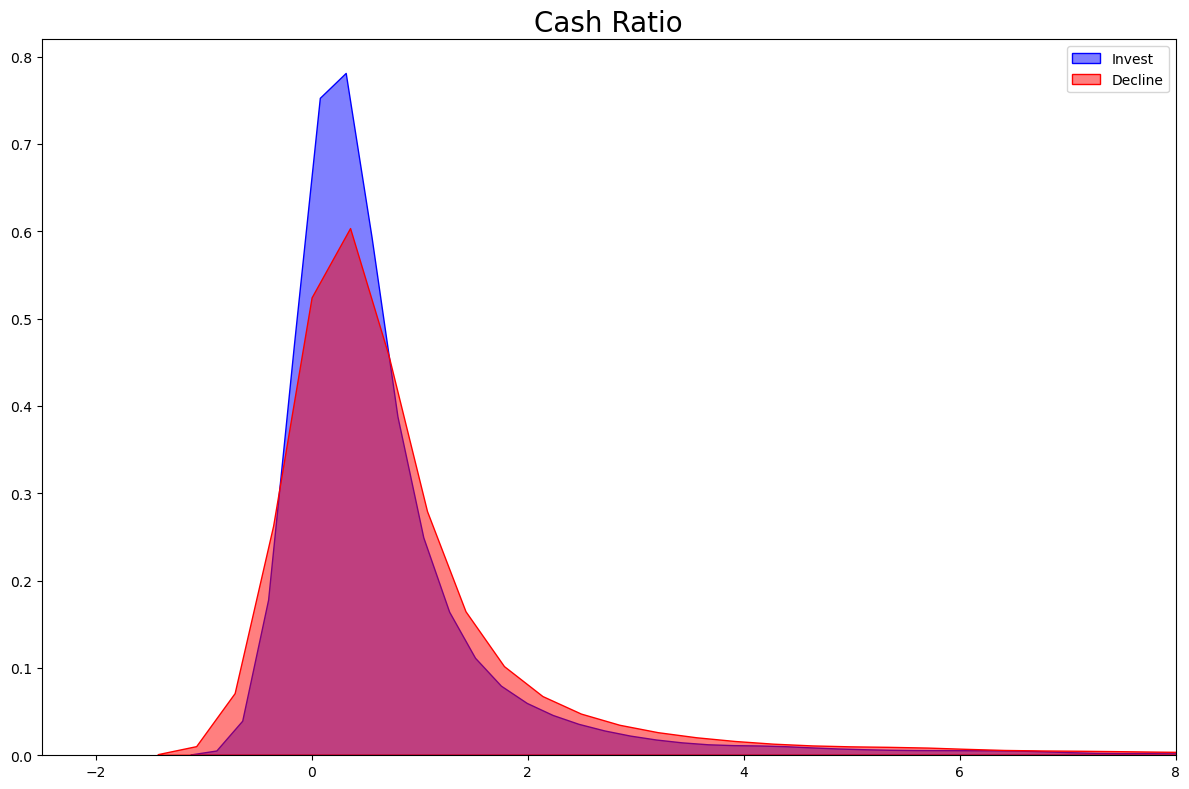

In [34]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 1]['Cash Ratio'],
           shade=True,
           label = 'Invest',
           color = 'blue',
           alpha = 0.5)

sns.kdeplot(indicators[indicators.Class == 0]['Cash Ratio'],
           shade=True,
           label = 'Decline',
           color = 'red',
           alpha = 0.5)



plt.xlabel(None)
plt.ylabel(None)
plt.xlim(-2.5, 8)
plt.legend()
plt.title('Cash Ratio', size = 20)

plt.tight_layout()
plt.show()

Both the boxplot and the kernel density estimation graphs does not present siginificant differences between the invest and decline classes.  The next step will be to see whether either of them are normally distributed.

In [35]:
# Testing if the decline cash ratio is normally distributed.
stats.normaltest(indicators[indicators['Class'] == 0]['Cash Ratio'])

NormaltestResult(statistic=10491.999308018447, pvalue=0.0)

In [36]:
# Testing if the invest cash ratio is normally distributed.
stats.normaltest(indicators[indicators['Class'] == 1]['Cash Ratio'])

NormaltestResult(statistic=13589.070544378825, pvalue=0.0)

A pvalue of 0 indicates that both are not normally distributed.  Since that is the case, I will now perform a permutation hypothesis test on the difference of their means.  The null hypothesis of the null value is that the mean values are eqaual to each other.

To perform the test I first need to extract the observed value, in this case the observed mean.

In [37]:
# Calculating the cash ratio's difference of means
cr_observed = (indicators[indicators['Class'] == 0]['Cash Ratio']).mean() - (indicators[indicators['Class'] == 1]['Cash Ratio']).mean()

# Making sure the difference of means is a positive number
cr_observed = abs(cr_observed)

# Checking the absolute difference of means
cr_observed

0.22875634797253241

Now it is time to perform a permutation test.

In [38]:
# First, isolate the cash ratio and class into a separate dataframe.
cr = indicators[['Cash Ratio', 'Class']]

# Second, make a list called cr_difference.
cr_difference = []

# Now make a for loop that does the following 5,000 times:
# 1. makes a permutation of the 'Cash Ratio' feature
# 2. calculates the difference in the mean cash ratio for invest and the mean rating for decline. 
for i in range(5000):
    cr[i] = np.random.permutation(cr['Cash Ratio'])
    cr_difference.append(cr[i].groupby(cr['Class']).mean()[0] - cr[i].groupby(cr['Class']).mean()[1])

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


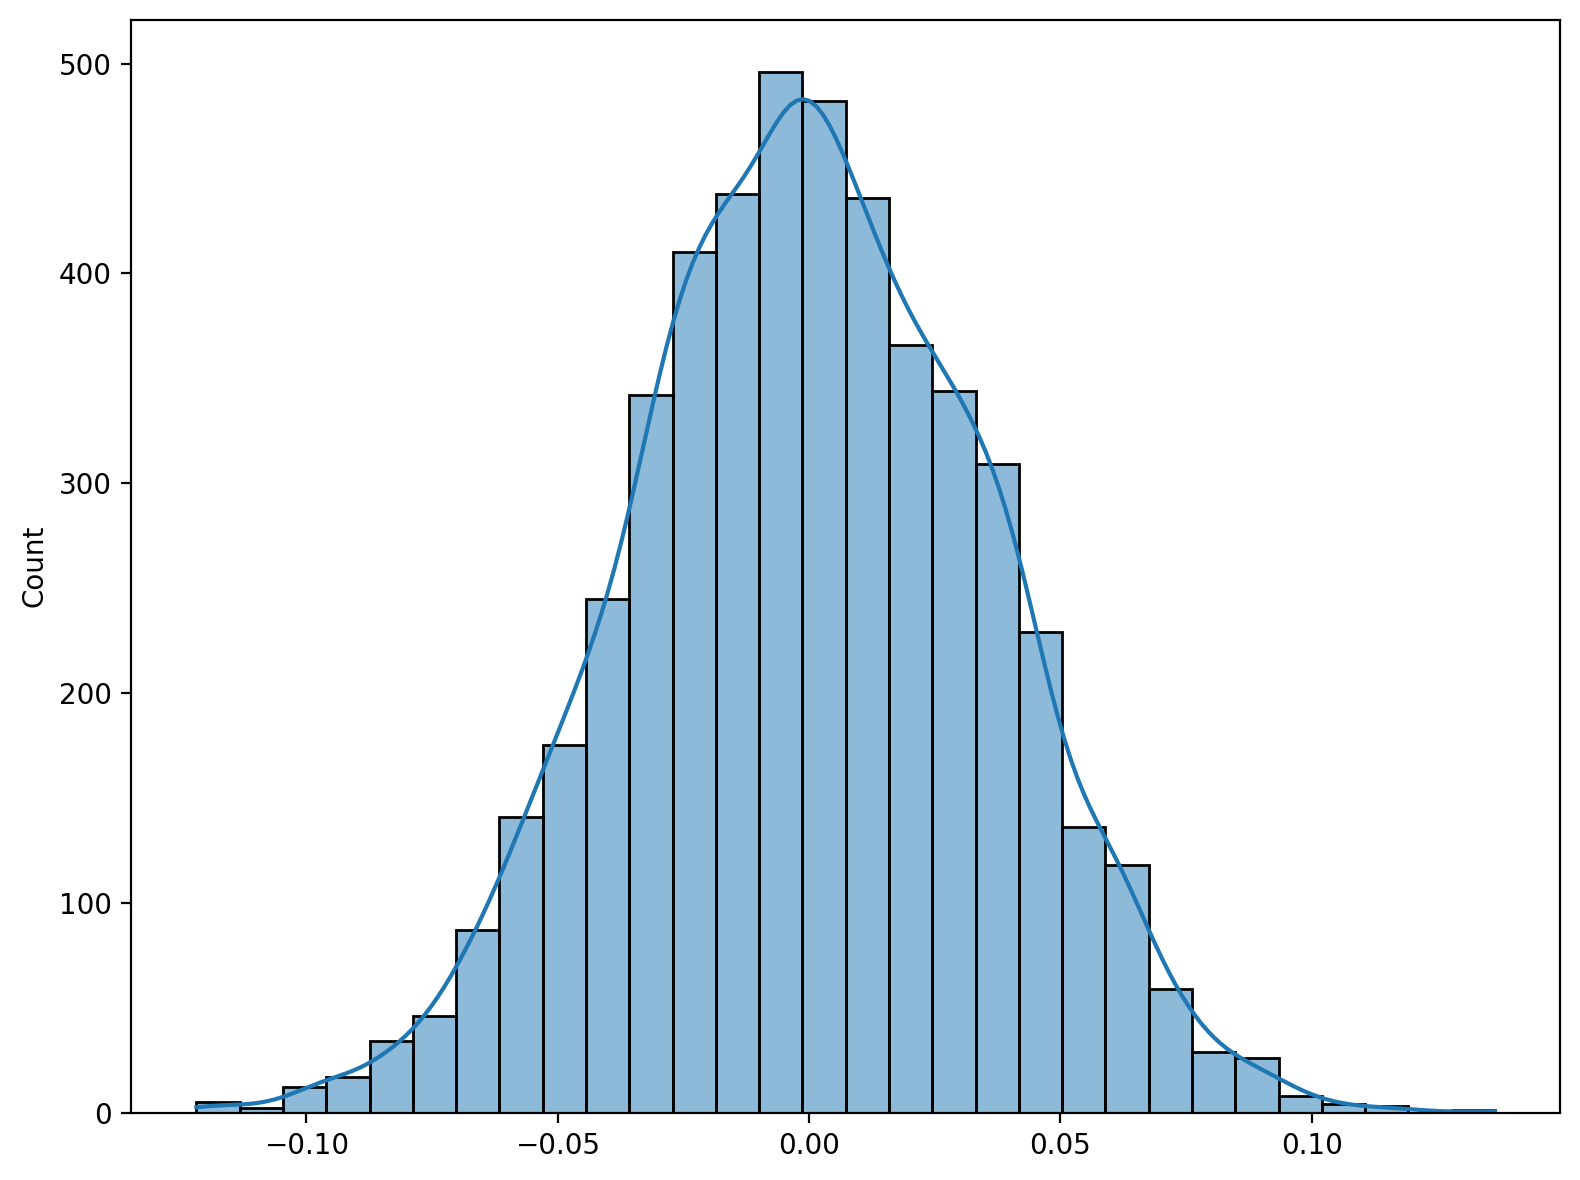

In [39]:
plt.figure(figsize = (8, 6), dpi = 200)
sns.histplot(cr_difference, bins = 30, kde = True)

plt.tight_layout()
plt.show()

Now that we have a list of 5,000 differences from the permutation, it is time to figure out the pvalue.  The pvalue in this case is calculated by fiding out the probability that the values in the difference list is at least as extreme as the observed value.

In [40]:
# The pvalue is the average time the permutation mean is at least as great as the observed value.
np.sum(np.array(cr_difference) >= cr_observed) / len(cr_difference)

0.0

With a pvalue of 0.0, I can conclude that there the mean values for the cash ratio are significantly different between the invest and decline categories.

#### Debt Ratio Hypothesis Test

Again let's first check the distribution graphically with the boxplots and the density graphs.

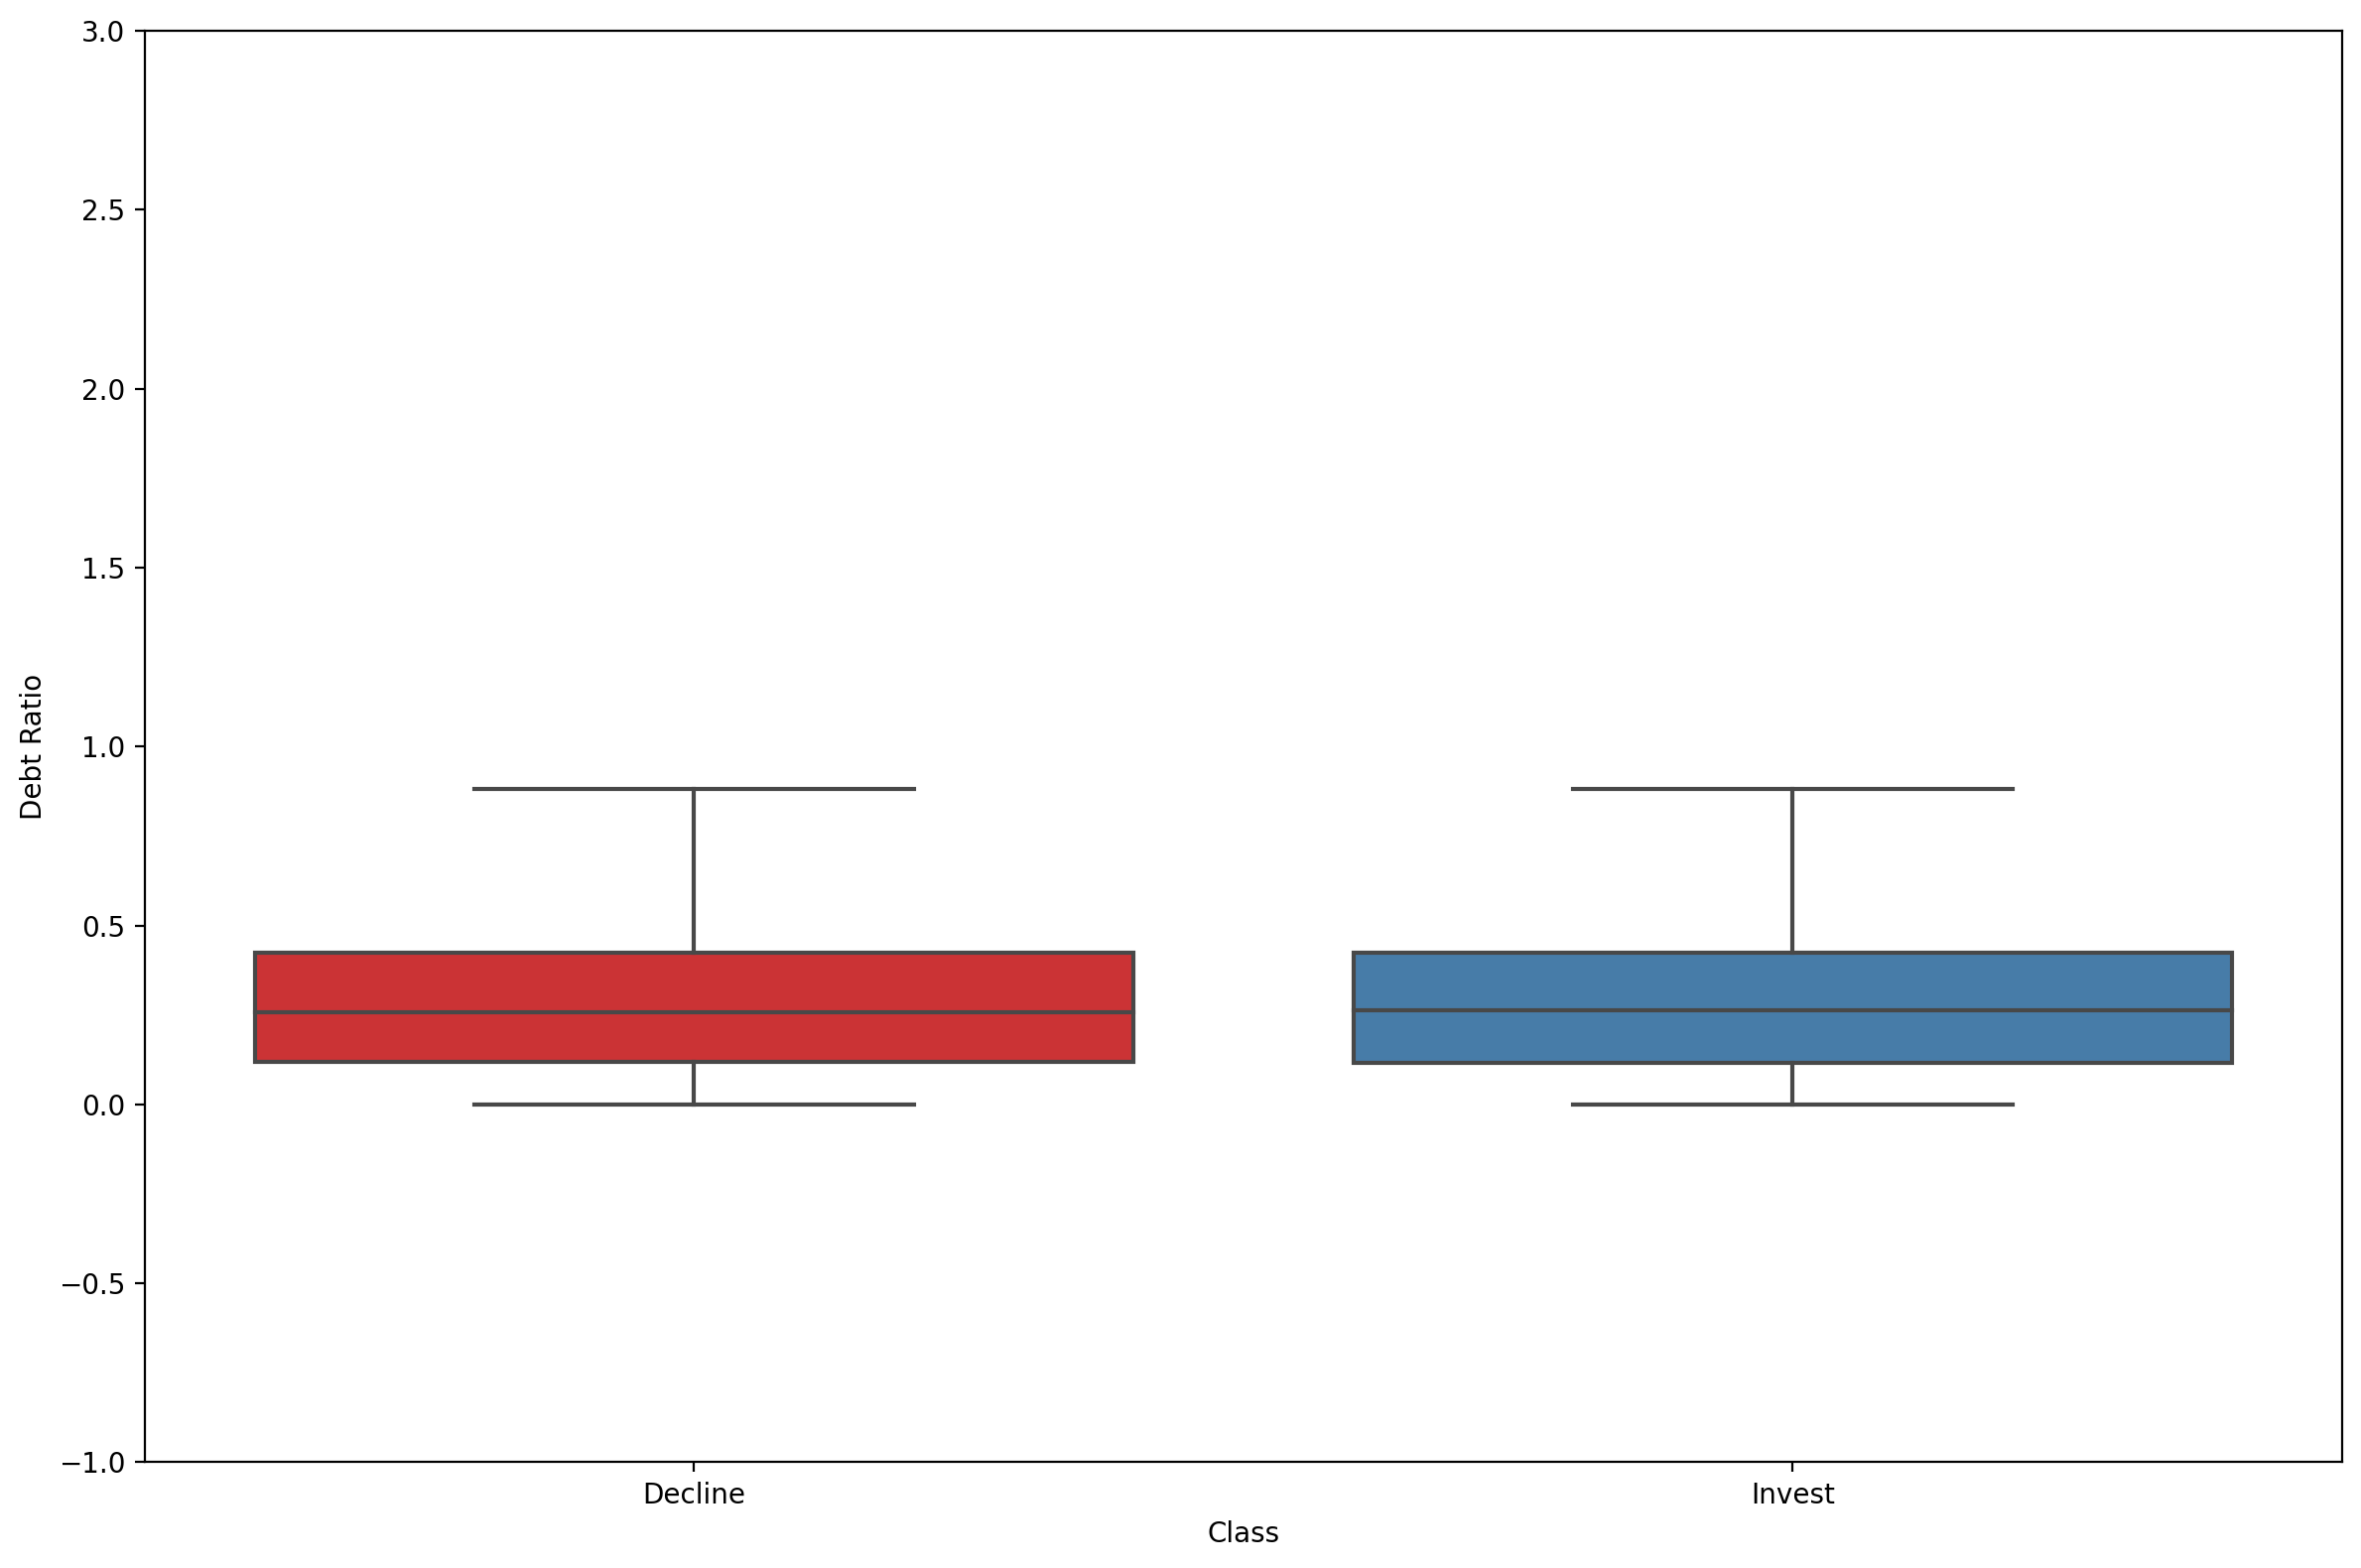

In [41]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)

ax = sns.boxplot(x = 'Class',
                 y = 'Debt Ratio',
                 data = indicators,
                 showfliers = False,
                 palette = 'Set1')

ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1, 3)

plt.tight_layout()
plt.show()

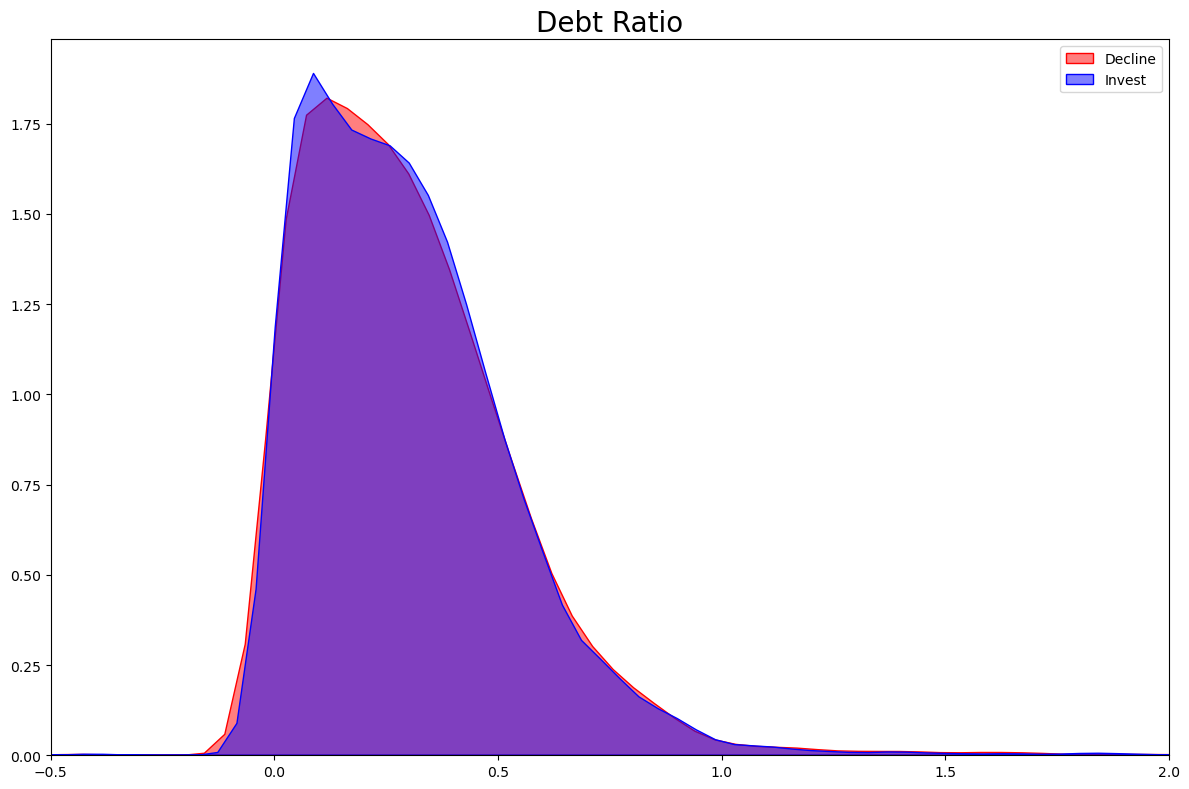

In [42]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Debt Ratio'],
           shade=True,
           label = 'Decline',
           color = 'red',
           alpha = 0.5)

sns.kdeplot(indicators[indicators.Class == 1]['Debt Ratio'],
           shade=True,
           label = 'Invest',
           color = 'blue',
           alpha = 0.5)

plt.xlabel(None)
plt.ylabel(None)
plt.xlim(-0.5, 2)
plt.legend()
plt.title('Debt Ratio', size = 20)

plt.tight_layout()
plt.show()

The graphs reinforces the idea that the mean and the standard deviation may be the same for both invest and decline categories.  I will now check how each are distributed to decide on the type of hypothesis test I will do.

In [43]:
# Testing if the decline cash ratio is normally distributed.
stats.normaltest(indicators[indicators['Class'] == 0]['Debt Ratio'])

NormaltestResult(statistic=9721.370960407214, pvalue=0.0)

In [44]:
# Testing if the decline cash ratio is normally distributed.
stats.normaltest(indicators[indicators['Class'] == 1]['Debt Ratio'])

NormaltestResult(statistic=10825.768812602017, pvalue=0.0)

As in the previous test, with a p-value of 0.0 it is safe to say that the distributions are not normal.  With that in mind, I will once again make use of the permutation test.

Let me start by getting the observed mean difference.

In [45]:
dr_observed = (indicators[indicators['Class'] == 0]['Debt Ratio']).mean() - (indicators[indicators['Class'] == 1]['Debt Ratio']).mean()

dr_observed = abs(dr_observed)

dr_observed

0.0015916093421071698

In [46]:
# First, isolate the debt ratio and class into a separate dataframe.
dr = indicators[['Debt Ratio', 'Class']]

# Second, make a list called dr_difference.
dr_difference = []

# Now make a for loop that does the following 5,000 times:
# 1. makes a permutation of the "Debt Ratio" feature.
# 2. calculates the difference in the mean rating for invest and the mean rating for decline. 
for i in range(5000):
    dr[i] = np.random.permutation(dr['Debt Ratio'])
    dr_difference.append(dr[i].groupby(dr['Class']).mean()[0] - dr[i].groupby(dr['Class']).mean()[1])

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


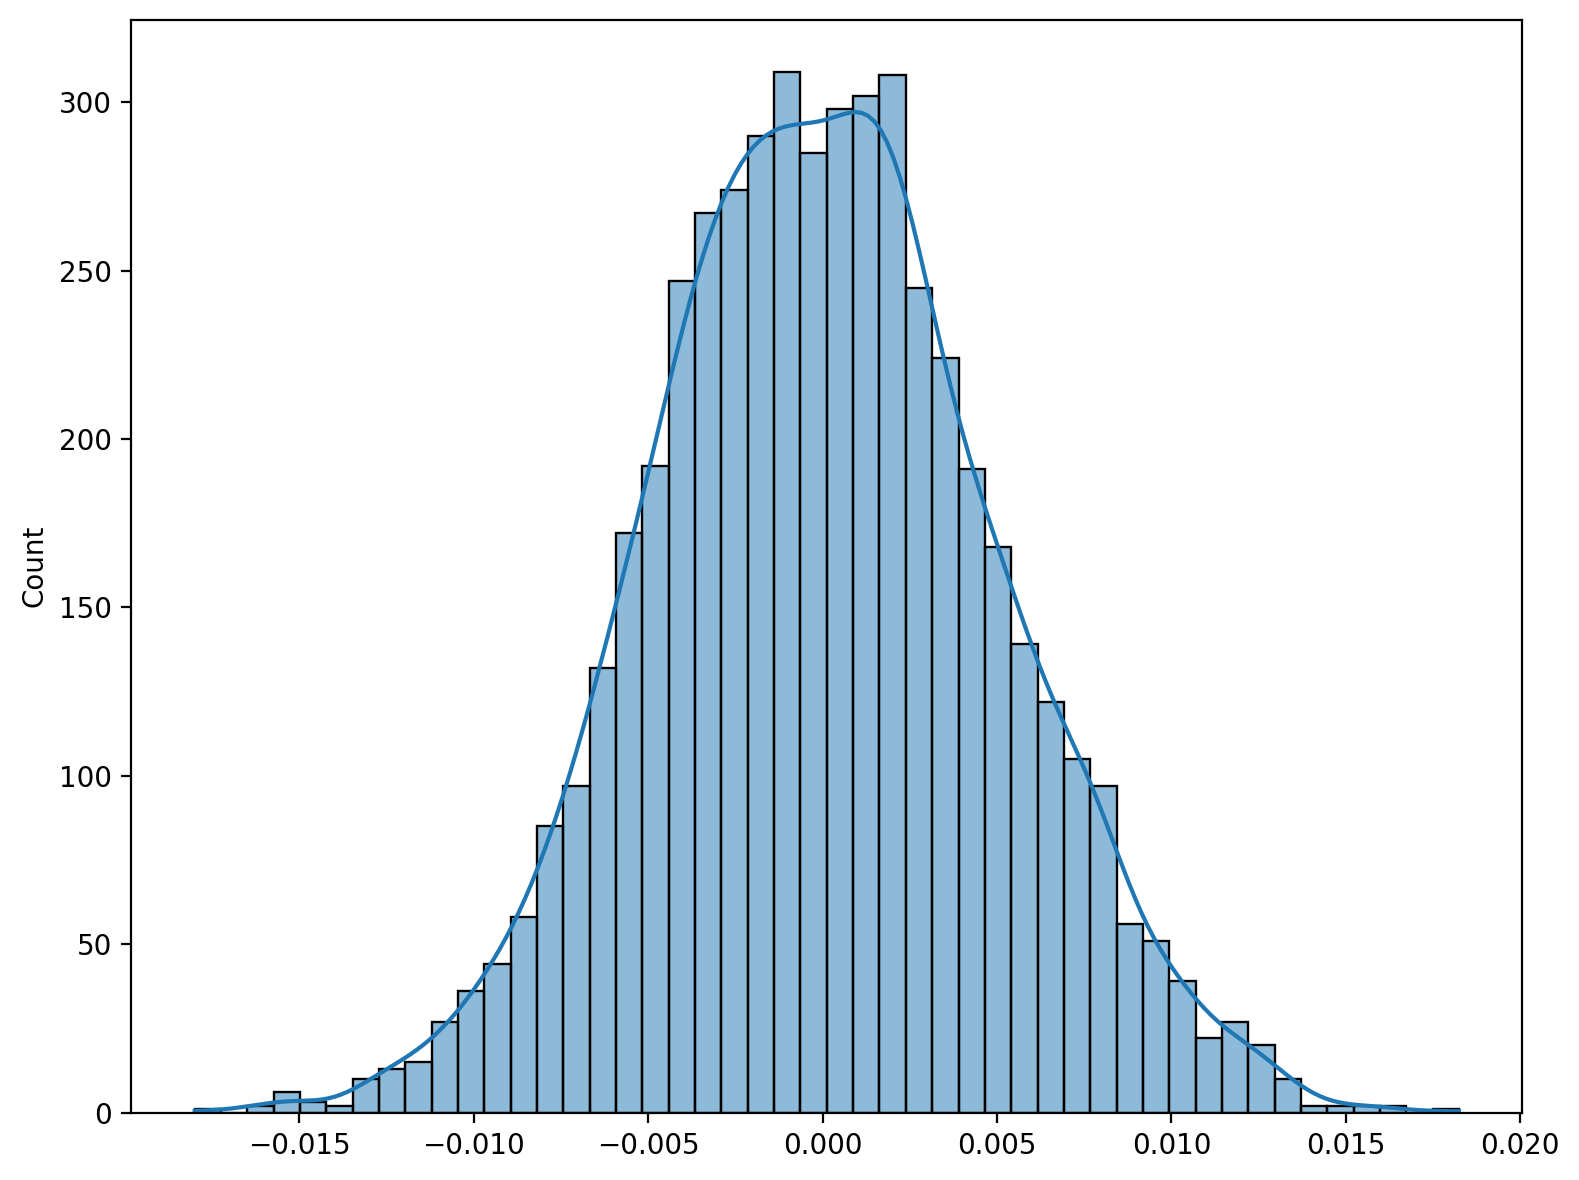

In [47]:
plt.figure(figsize = (8, 6), dpi = 200)
sns.histplot(dr_difference, kde = True)

plt.tight_layout()
plt.show()

The graph shows that the mean difference in the permutated data can be considered normally distributed.  Now I will take the pvalue for the test.

In [48]:
# The pvalue is the proportion of permutated values that is at least as great as the observed value.
np.sum(np.array(dr_difference) >= dr_observed) / len(dr_difference)

0.3698

The p-value is large enough that I must accept that there is no significant evidence the mean debt ratio values between the invest and the decline categories are different.

Let me take the observed standard deviation difference.

In [49]:
dr_observed_std = (indicators[indicators['Class'] == 0]['Debt Ratio']).std() - (indicators[indicators['Class'] == 1]['Debt Ratio']).std()

dr_observed_std = abs(dr_observed_std)

dr_observed_std

0.031070126760180616

Since I have already succeeded in permutating the debt ratio 5,000 times, I will utilized the same already permuted dataframe in order to perform this test.

In [50]:
# First, make a list called dr_difference_std.
dr_difference_std = []

# Now make a for loop that calculates the difference in the standard deviation 5,000 times.
for i in range(5000):
    dr_difference_std.append(dr[i].groupby(dr['Class']).std()[0] - dr[i].groupby(dr['Class']).std()[1])

Now I will plot the standard deviation difference.

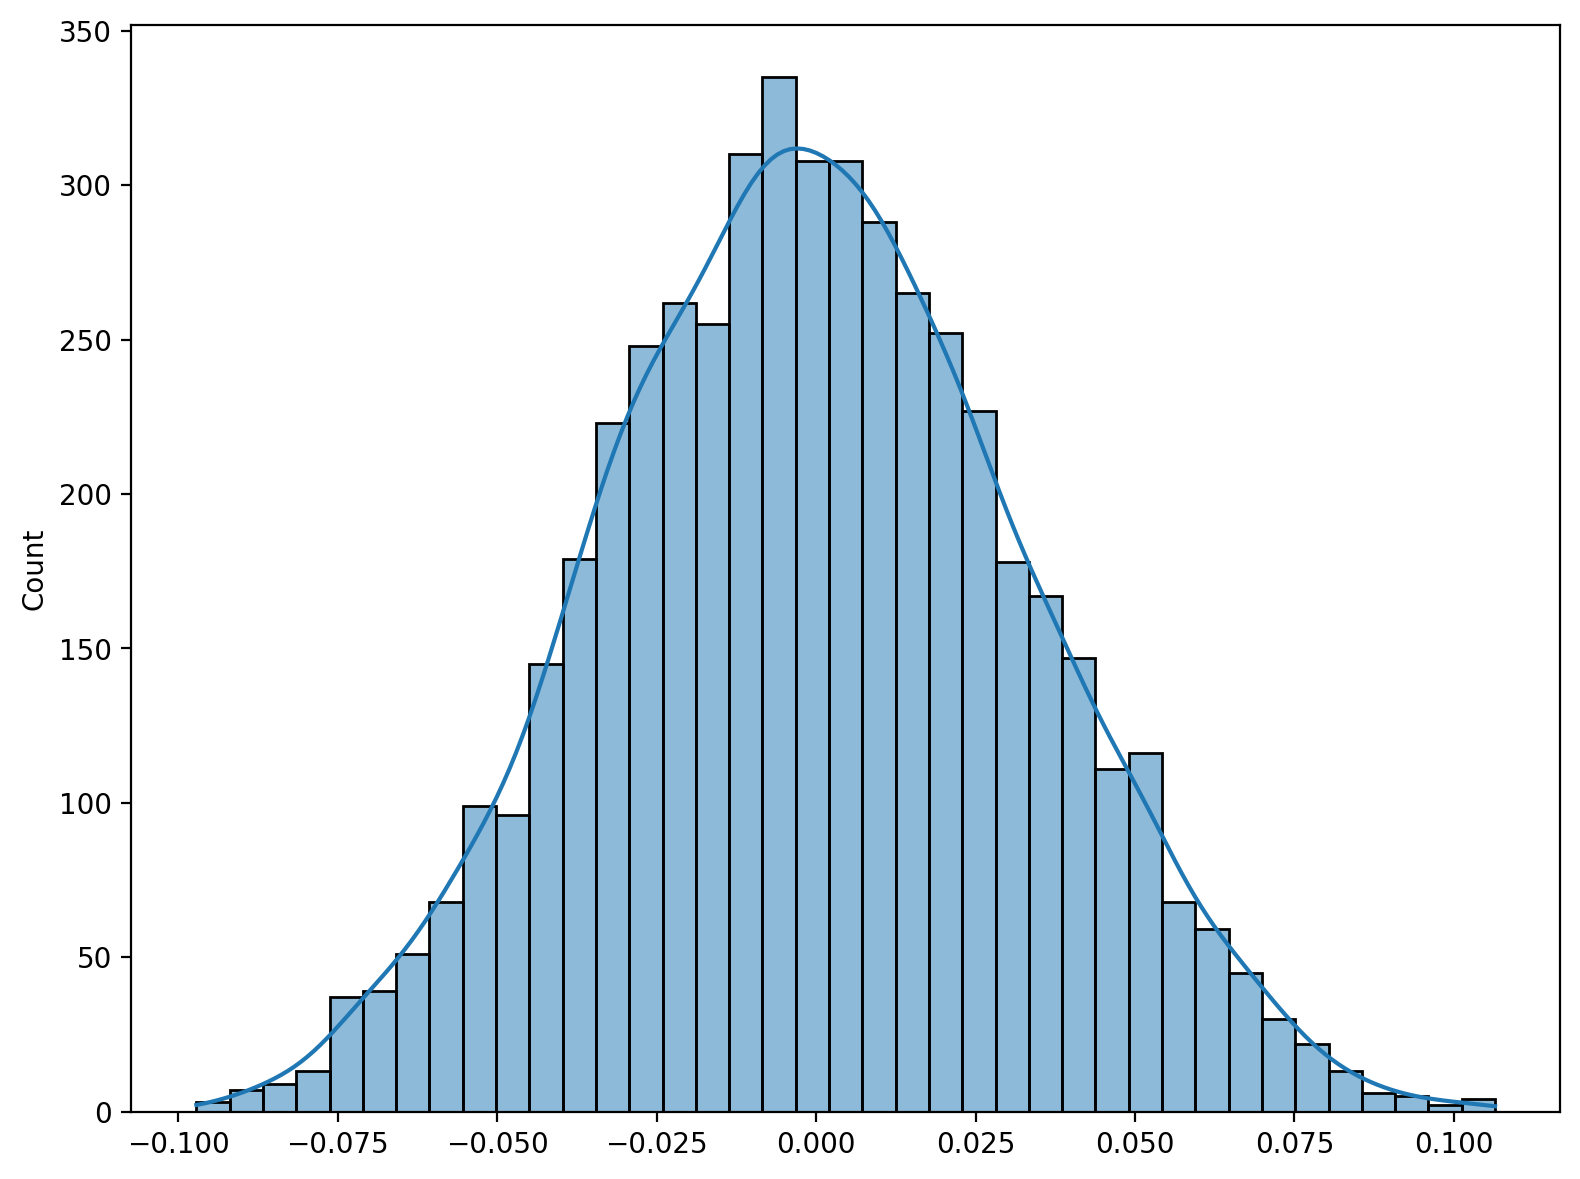

In [51]:
plt.figure(figsize = (8, 6), dpi = 200)
sns.histplot(dr_difference_std, kde = True)

plt.tight_layout()
plt.show()

The plot illustrates that the difference in the permutated standard deviation can be considered normally distributed.  Because of that, I can now move on and find the pvalue.

In [52]:
# The pvalue is the proportion of the permutated standard deviation difference that is at least as great as the observed value.
np.sum(np.array(dr_difference_std) >= dr_observed_std) / len(dr_difference_std)

0.1752

The p-value is too great, and therefore I cannot reject the idea that the standard deviation of the debt ratio has no difference between the invest and the decline categories.

Since there are no significant differences between both the means and standard deviations, the debt ratio feature deserves to have a closer look once the project moves on to the machine learning part.  The reason for that is the machine learning algorithm may work better without this feature and that is an option that will be considered.

#### Asset Turnover Ratio Hypothesis Test

Again, Let's first take a look at it graphically.

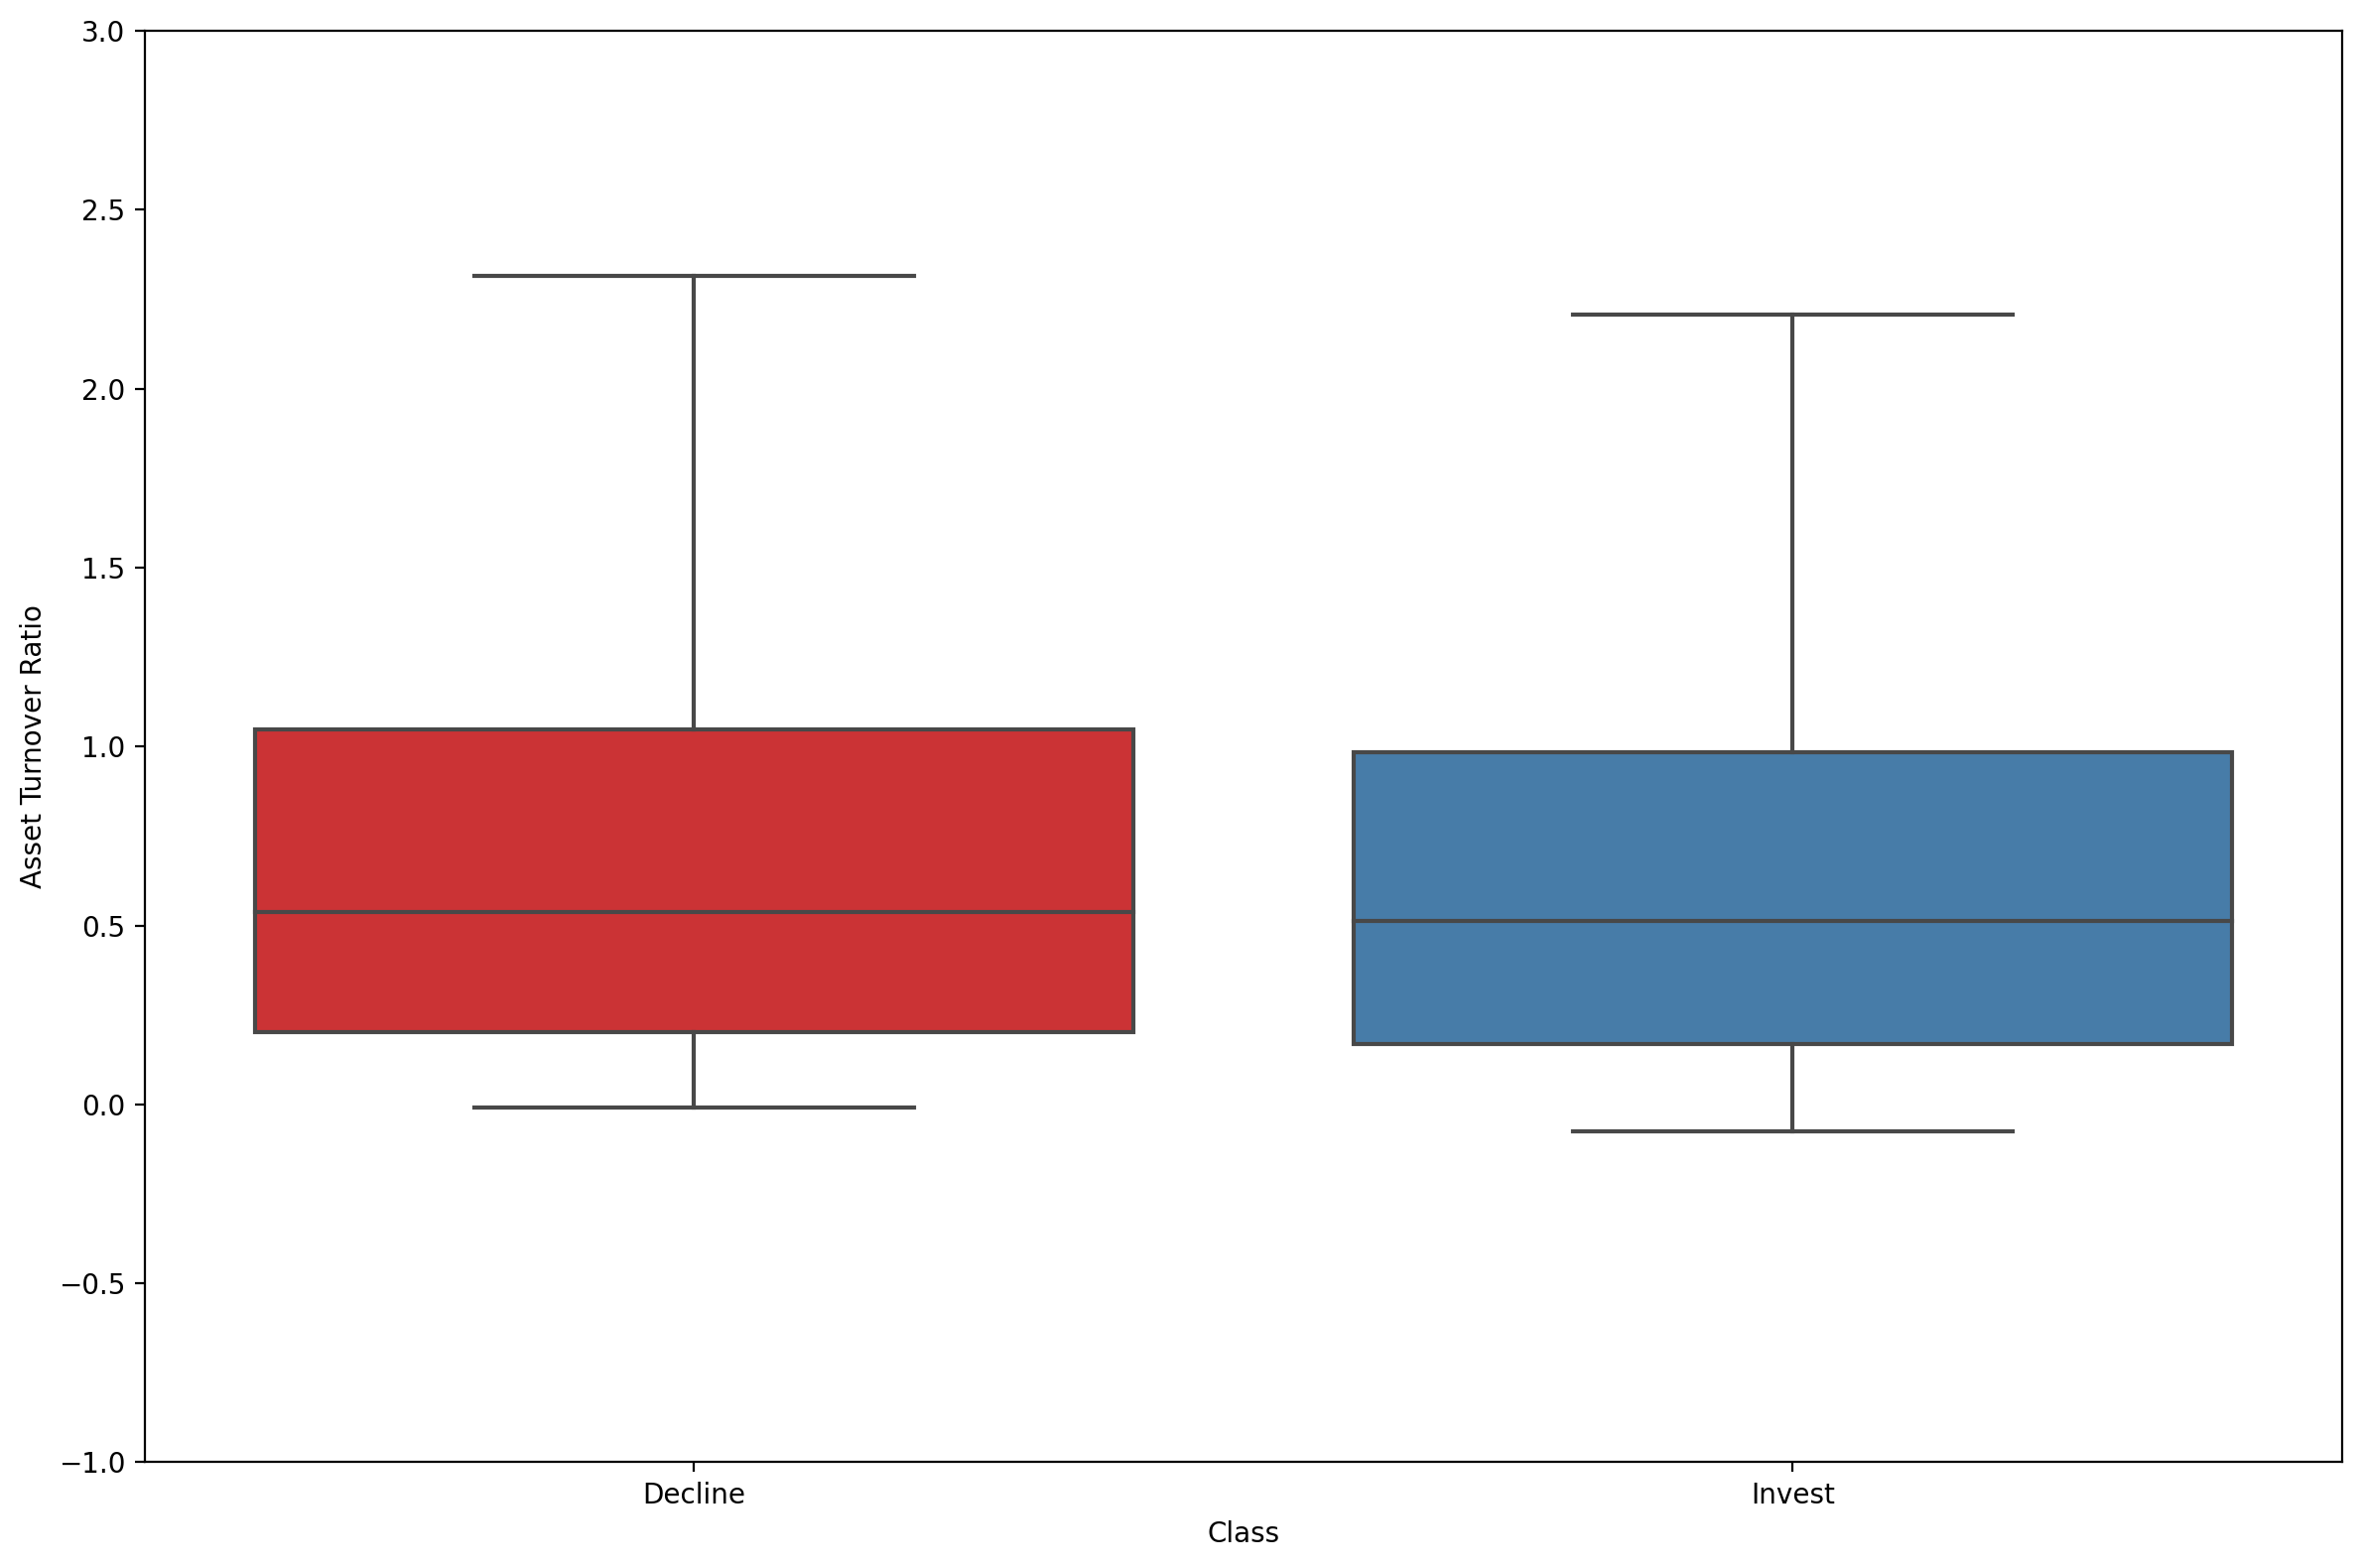

In [53]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 200)

ax = sns.boxplot(x = 'Class',
                 y = 'Asset Turnover Ratio',
                 data = indicators,
                 showfliers = False,
                 palette = 'Set1')

ax.set_xticklabels(['Decline', 'Invest'])
plt.ylim(-1, 3)

plt.tight_layout()
plt.show()

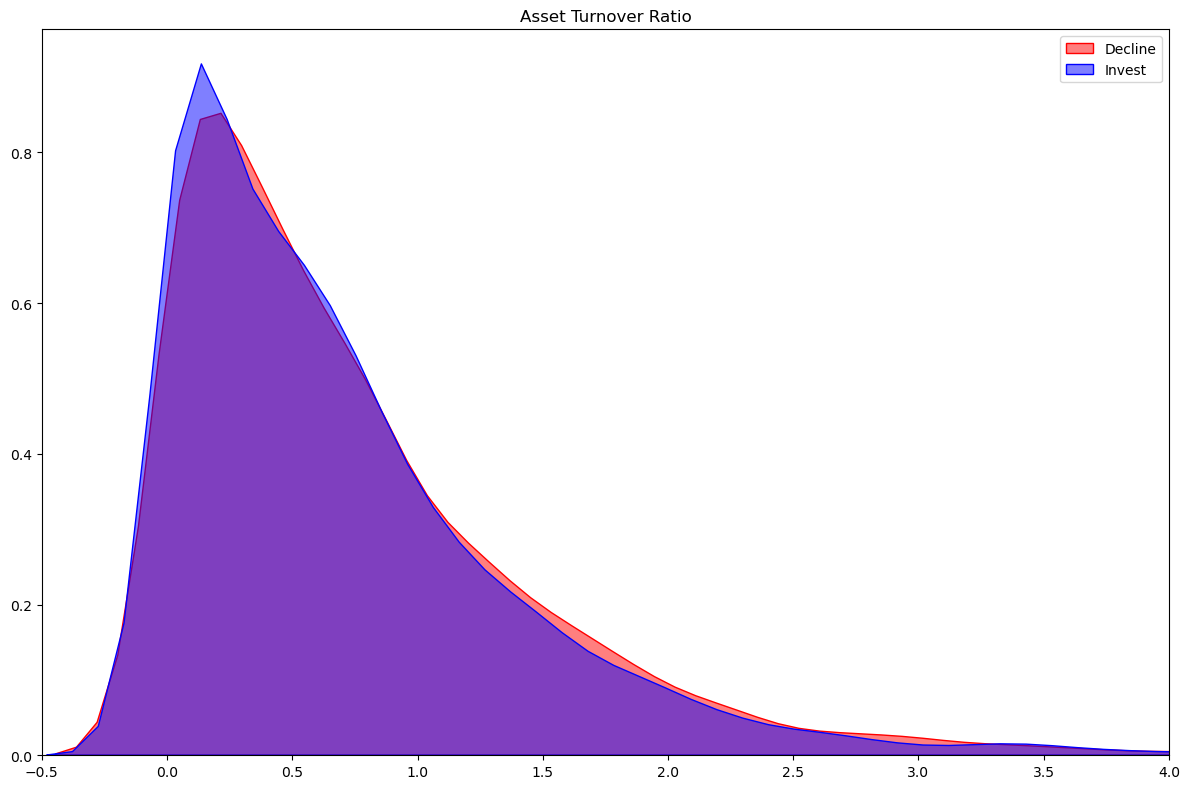

In [54]:
plt.figure(figsize=(12, 8), dpi = 100)

sns.kdeplot(indicators[indicators.Class == 0]['Asset Turnover Ratio'],
            shade=True,
            label = 'Decline',
            color = 'red',
            alpha = 0.5)

sns.kdeplot(indicators[indicators.Class == 1]['Asset Turnover Ratio'],
            shade=True,
            label = 'Invest',
            color = 'blue',
            alpha = 0.5)

plt.xlabel(None)
plt.ylabel(None)
plt.xlim(-0.5, 4)
plt.legend()
plt.title('Asset Turnover Ratio')

plt.tight_layout()
plt.show()

With not much graphical difference in their distribution, I will now check the distribution of the asset turnover ratio for both the invest and decline categories.

In [55]:
stats.normaltest(indicators[indicators['Class'] == 0]['Asset Turnover Ratio'])

NormaltestResult(statistic=6035.82502750759, pvalue=0.0)

In [56]:
stats.normaltest(indicators[indicators['Class'] == 1]['Asset Turnover Ratio'])

NormaltestResult(statistic=9186.636027091974, pvalue=0.0)

With a zero pvalue, both distributions can be considered not normalized.  Because of that I will once again use the permutation test.

The initial test will be to acquire the observed mean value.

In [57]:
atr_observed = (indicators[indicators['Class'] == 0]['Asset Turnover Ratio']).mean() - (indicators[indicators['Class'] == 1]['Asset Turnover Ratio']).mean()
atr_observed = abs(atr_observed)
atr_observed

0.04010303161881623

Now I will permutate the asset turnover ratio feature.

In [58]:
# First isolate the features in a new dataframe.
atr = indicators[['Asset Turnover Ratio', 'Class']]

# Second, make a list called difference.
atr_difference = []

# Now make a for loop that does the following 5,000 times:
# 1. makes a permutation of the 'Asset Turnover Ratio'
# 2. calculates the difference in the mean asset turnover ratio between the 2 categories. 
for i in range(5000):
    atr[i] = np.random.permutation(atr['Asset Turnover Ratio'])
    atr_difference.append(atr[i].groupby(atr['Class']).mean()[0] - atr[i].groupby(atr['Class']).mean()[1])

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


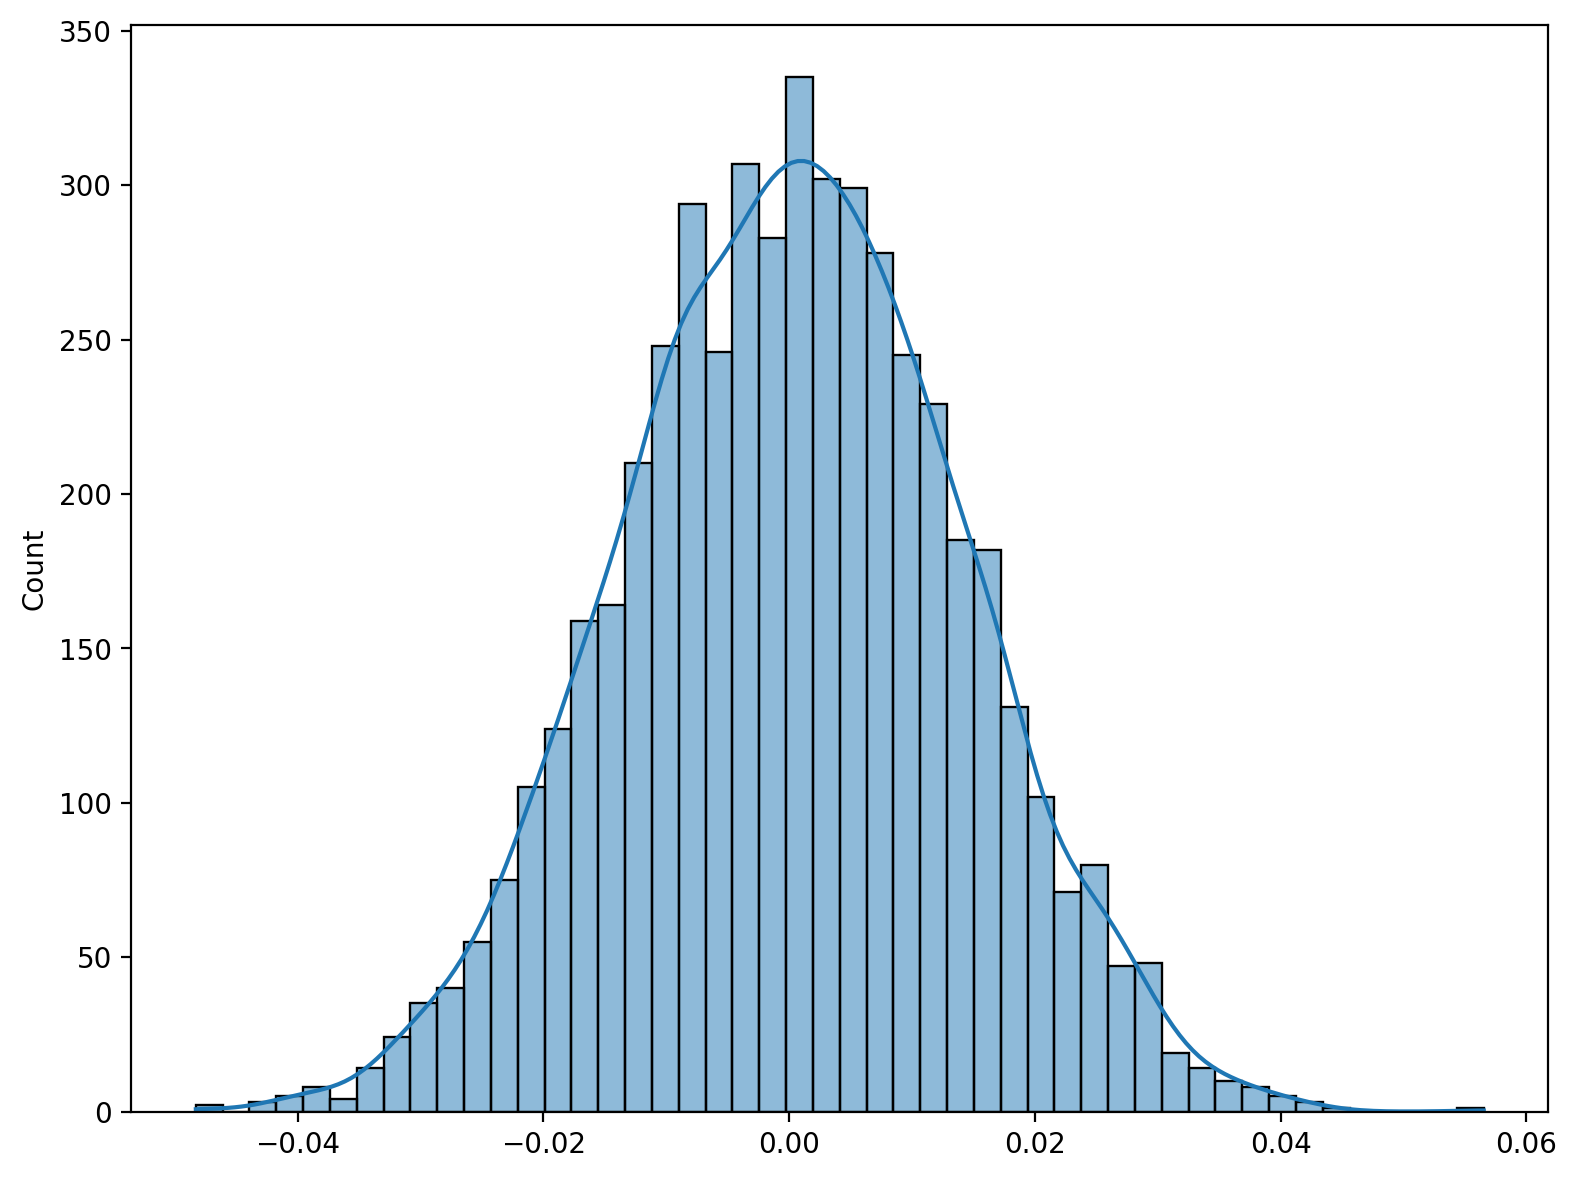

In [59]:
plt.figure(figsize = (8, 6), dpi = 200)
sns.histplot(atr_difference, kde = True)

plt.tight_layout()
plt.show()

I can see from the graph that the permutated asset turnover ratio mean difference is normally distributed.  Now I will check the pvalue.

In [60]:
# The pvalue is the proportion of the permutated asset turnover ratio that is at least as great as the observed mean.

np.sum(np.array(atr_difference) >= atr_observed) / len(atr_difference)

0.0012

Though it is not 0.0 as in the cash ratio, a p-value below 0.025 is low enough that it shows that there is a significant difference in the asset turnover ratio between the invest and the decline categories.

As the only feature in the study that can be considered a category, the way I will deal with the sector feature is mainly graphically.  I will use a barplot to check graphically if there seems to be any difference between the classes whithin each sector.

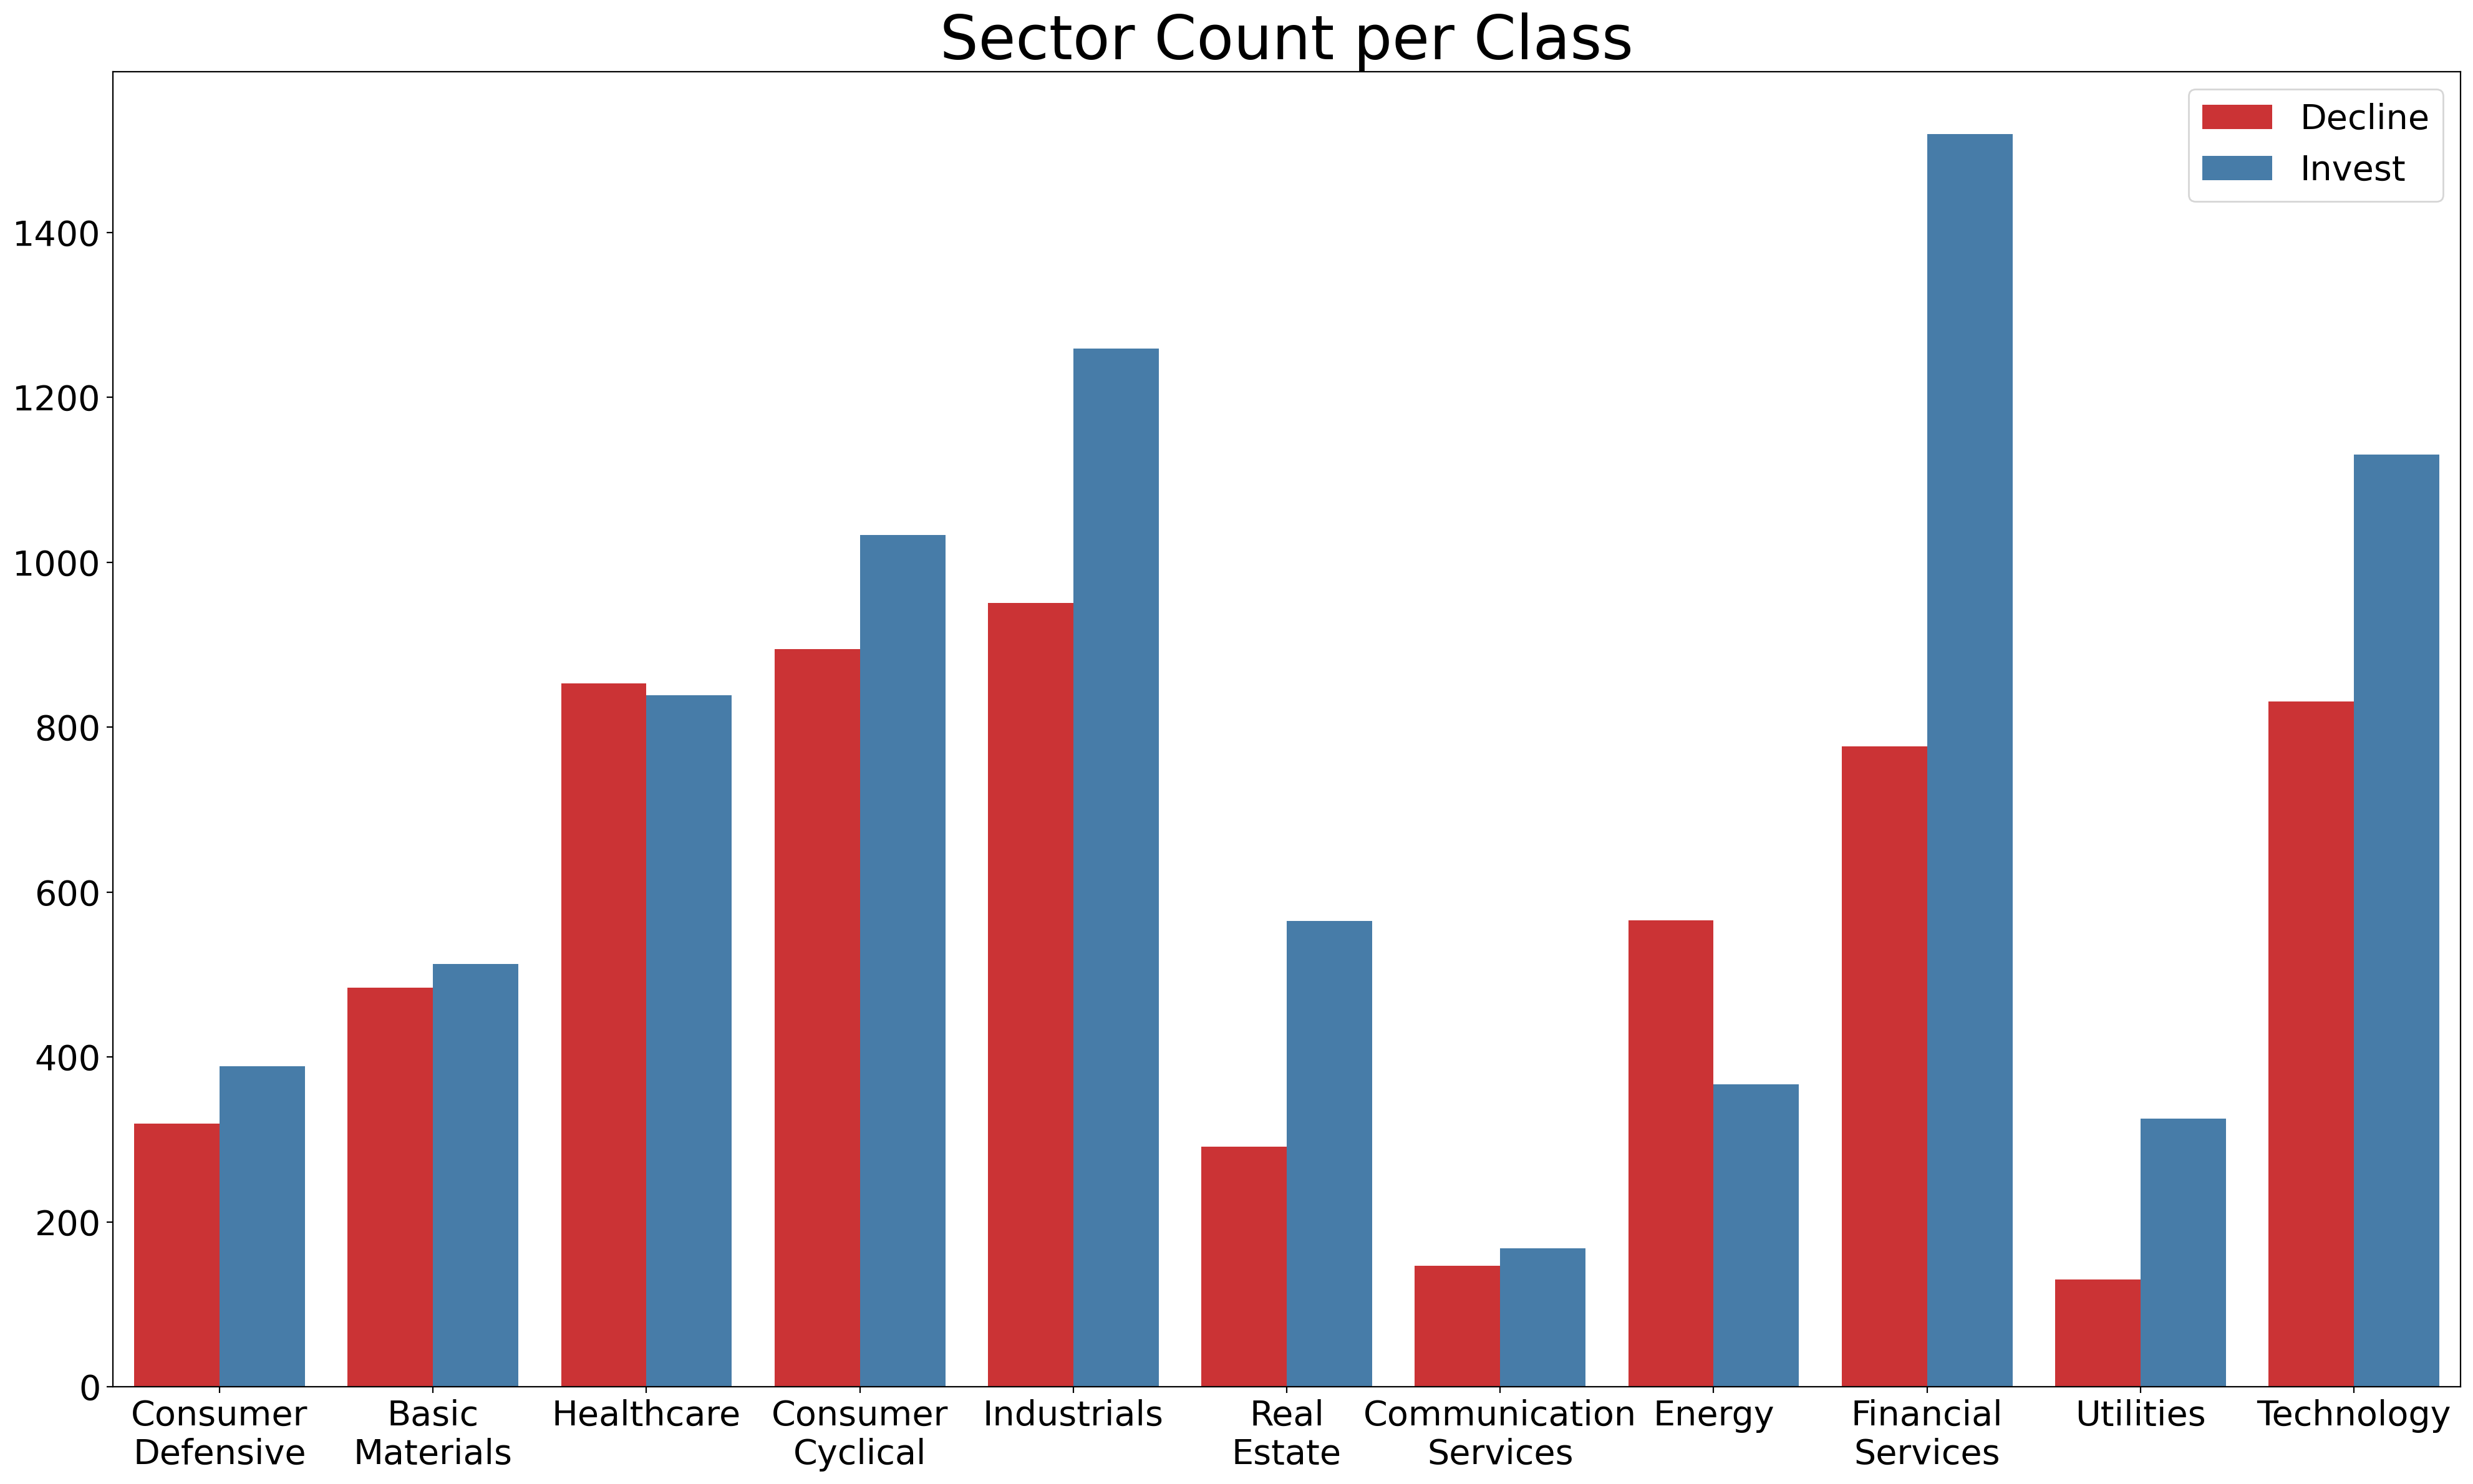

In [61]:
fig, ax = plt.subplots(figsize = (20, 12), dpi = 200)


list1 = []
for n in list(indicators.Sector.unique()):
    list1.append(n.split())

labels = []
for n in list1:
    if len(n) > 1:
        labels.append(n[0]+'\n'+n[1])
    else:
        labels.append(n[0])

ax = sns.countplot(x = 'Sector', hue = 'Class', data = indicators, palette = 'Set1')
ax.legend(['Decline', 'Invest'], fontsize = 20)
ax.set_xticklabels(labels, size = 20)

plt.yticks(size = 20)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Sector Count per Class", size = 35)

plt.tight_layout()
plt.show()

The barplot indicates that there are a few sectors in which the division of the classes seems to be nearly cut in half.  However, there are some sectors that seems to lean more towards the invest class, such as the financial services and the read estate sectors.  The only sector that leans more towards the decline class is the energy sector.

As a final step in the exploratory data analysis, I will check the correlation between the features with a heatmap.

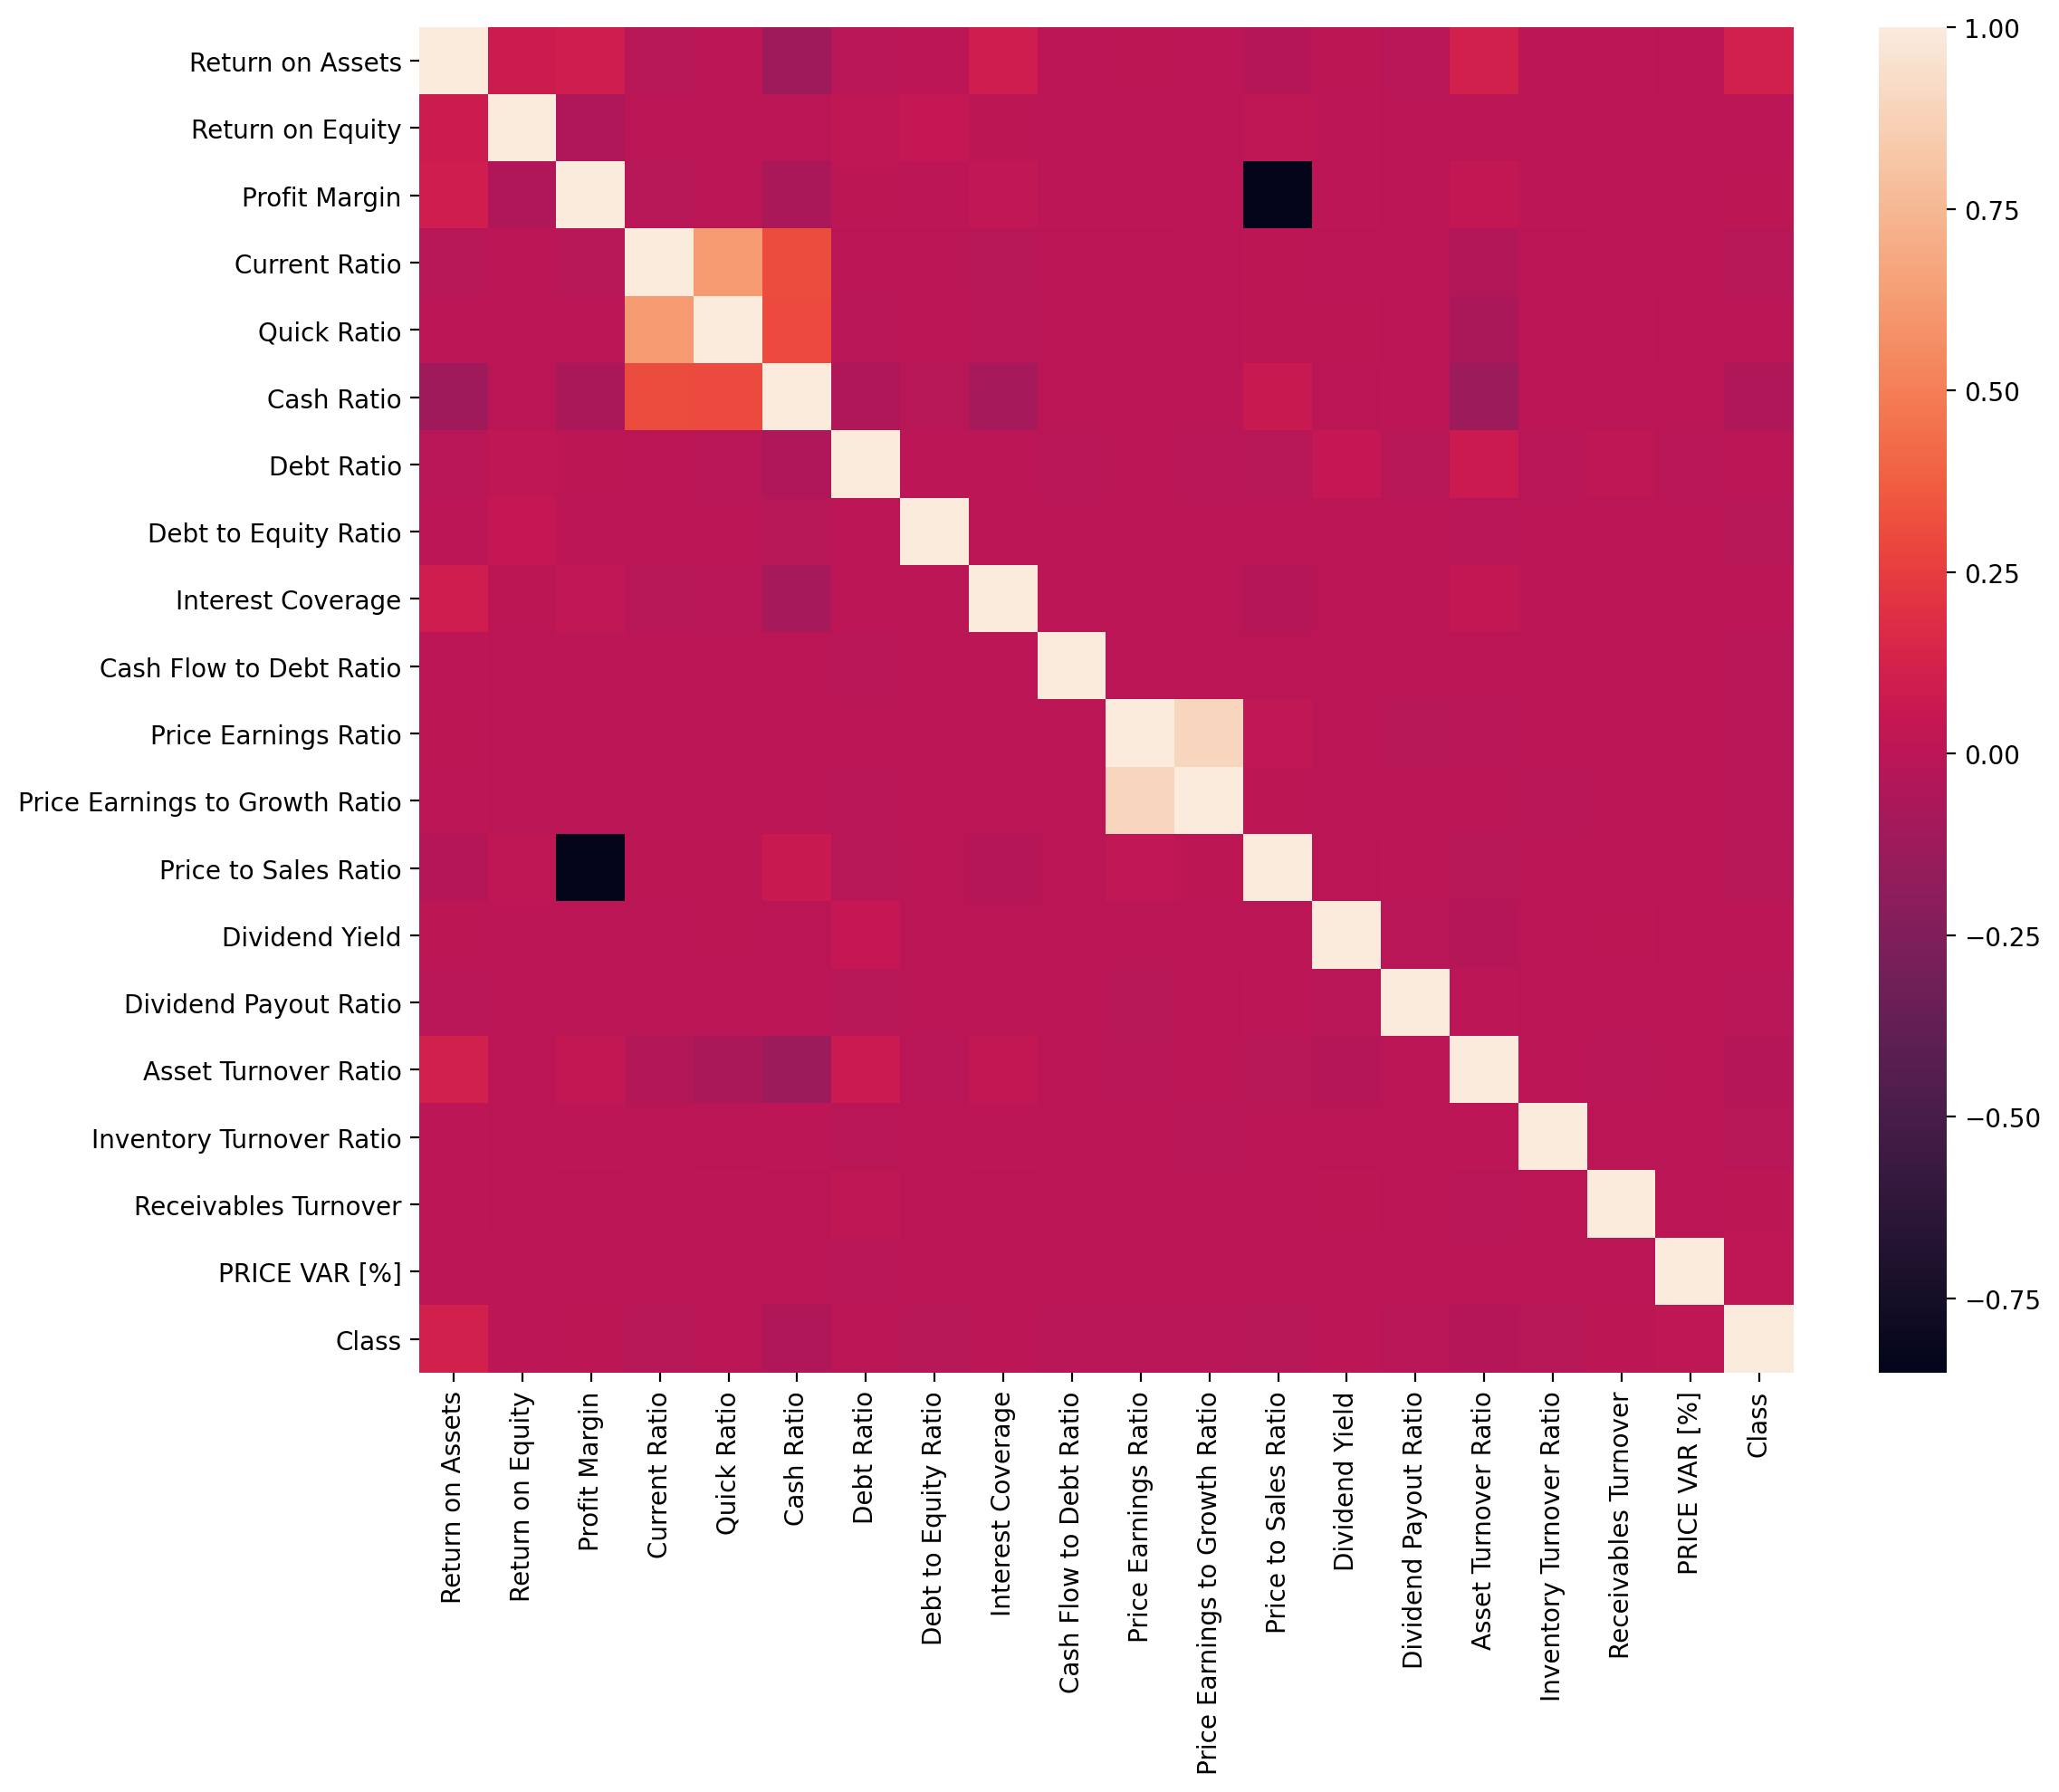

In [62]:
plt.figure(figsize = (12, 10), dpi = 200)

sns.heatmap(indicators.corr())

plt.tight_layout()
plt.show()

With the help of the heat map, I can see that there are features that may cause redundancies in the machine learning algorithm.  Those redundancies may hurt the efficacy of the algorithm so it is important to keep them in mind.  The correlated features are the quick ratio and the current ratio, the cash ratio with the current and quick ratios, and the price earnings to growth ratio and the price earnings ratio.  The only features that demonstrate a significant negative correlatio is the price to sales ratio and the profit margin.

To have a better look at the correlating features, I will create a list to isolate them and create another heatmap using said list.

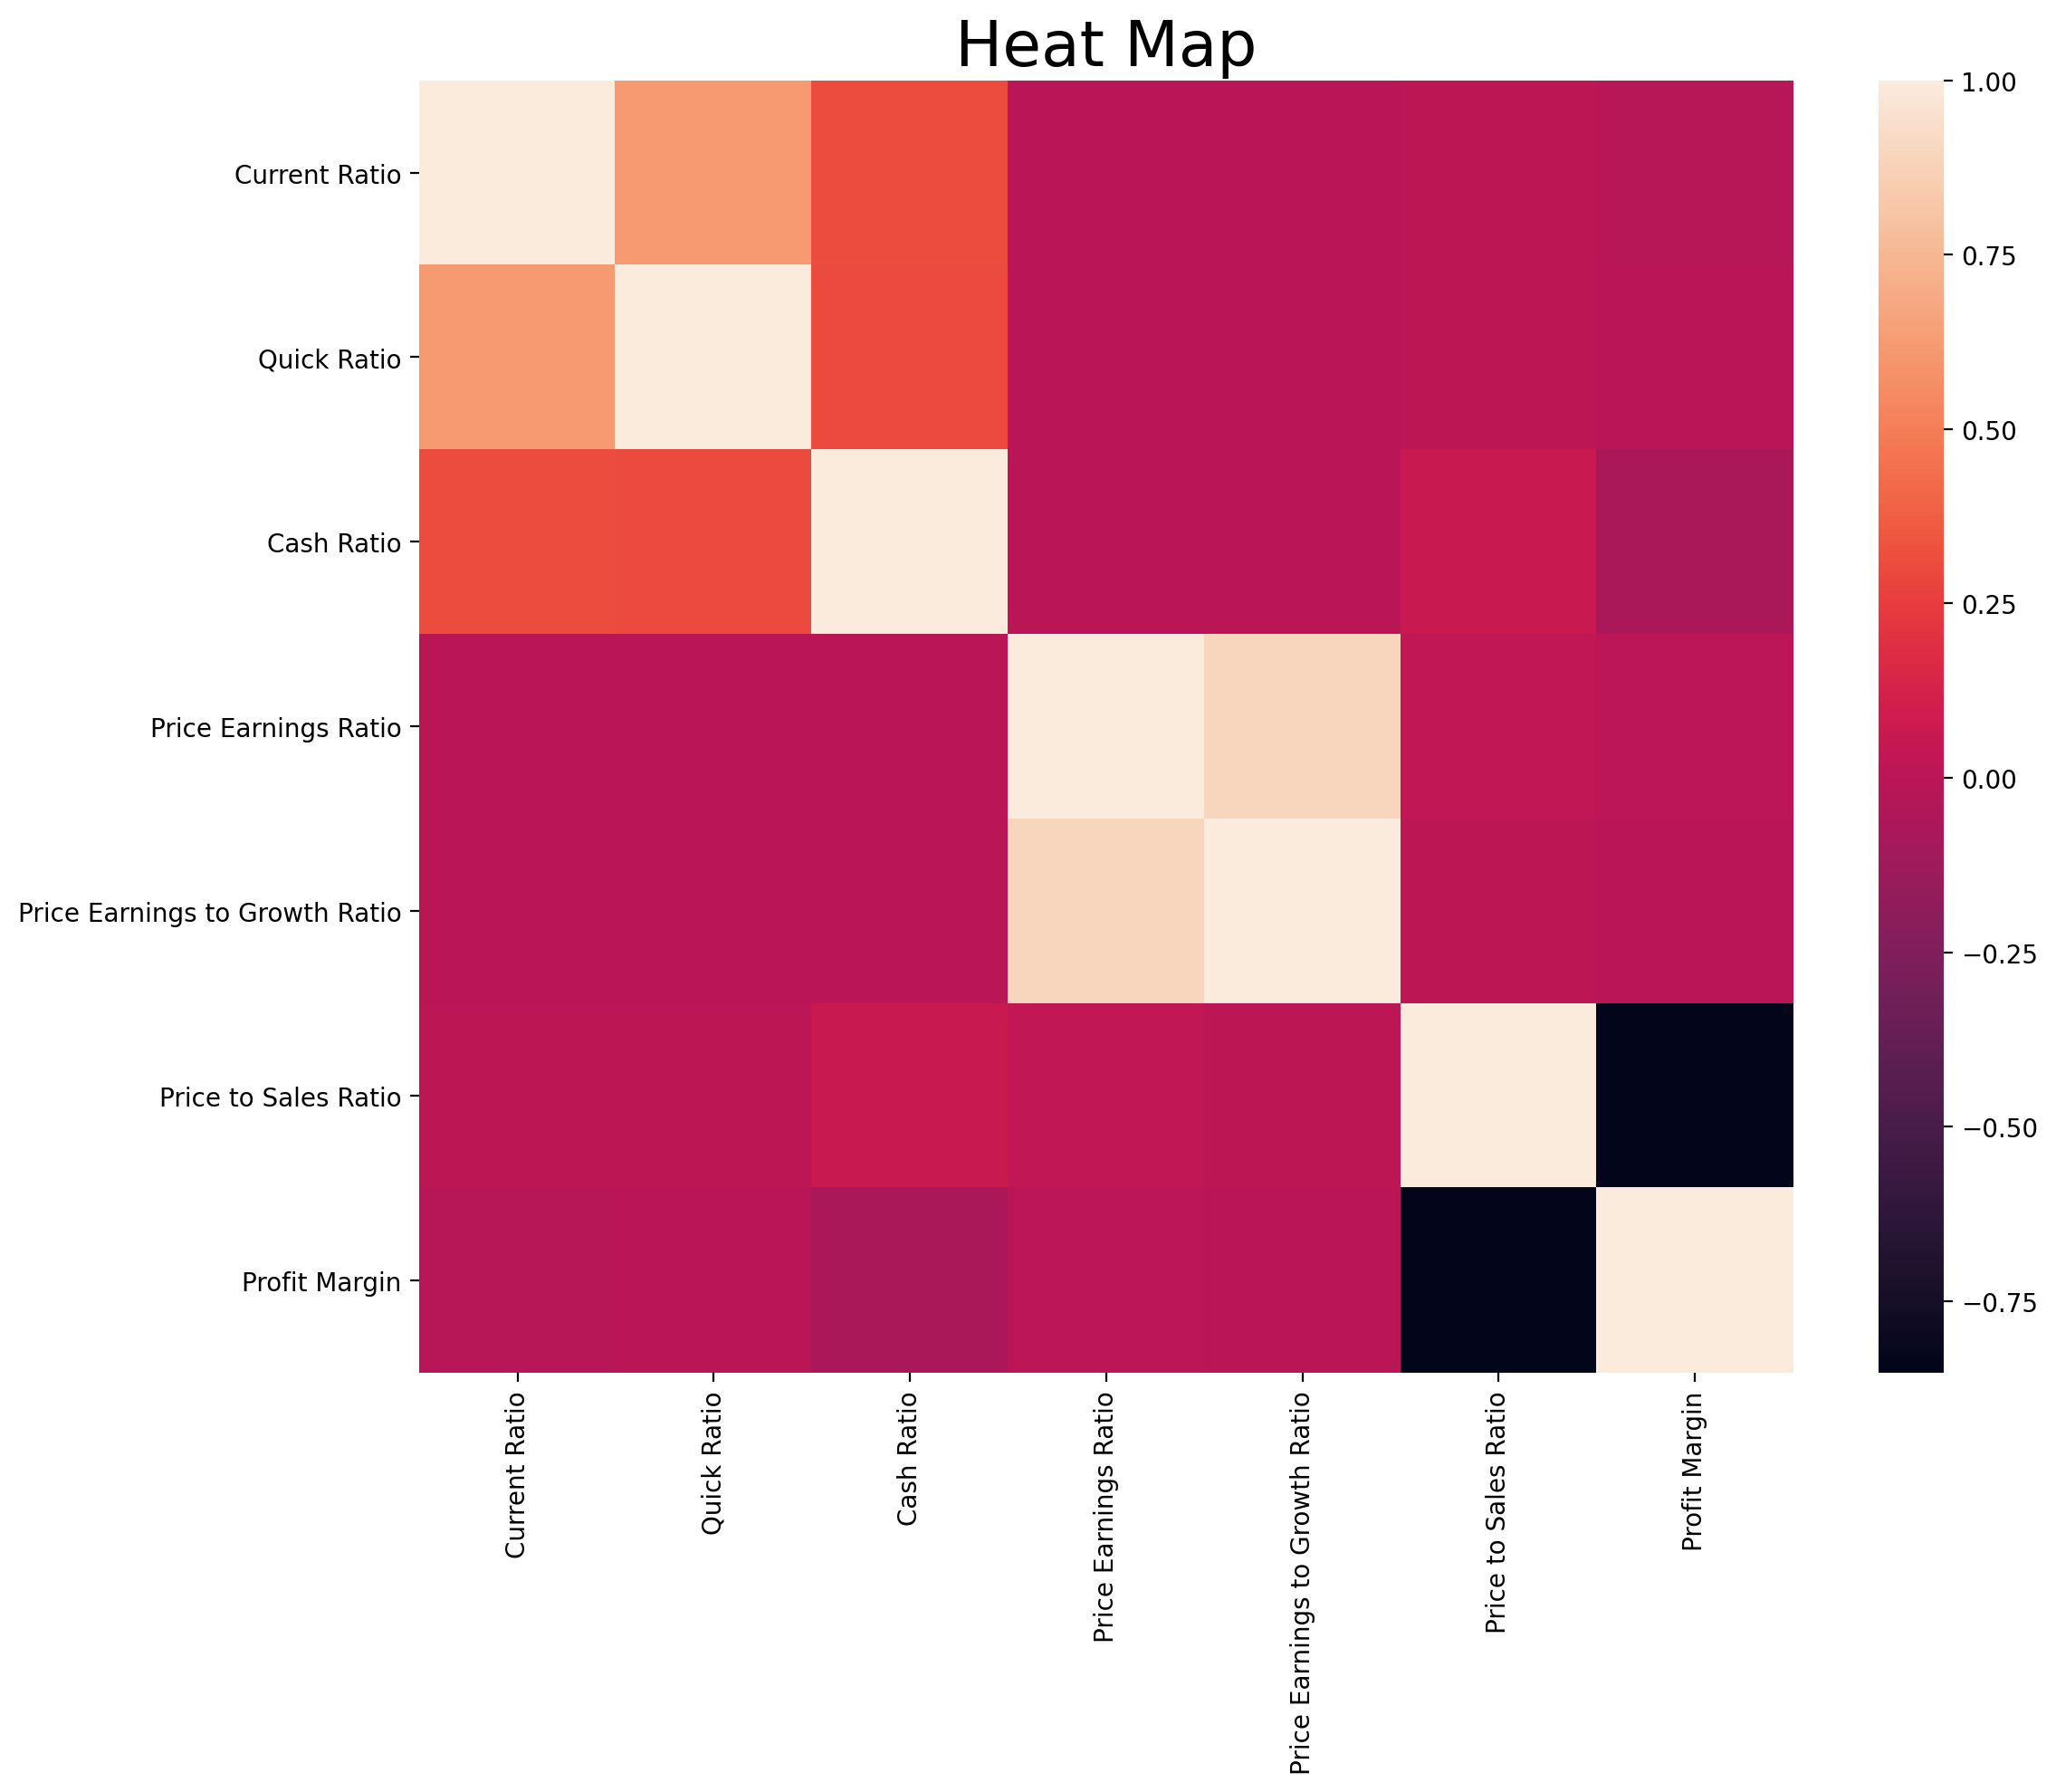

In [63]:
correlation = ['Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Price Earnings Ratio', 'Price Earnings to Growth Ratio', 
              'Price to Sales Ratio', 'Profit Margin']

plt.figure(figsize = (12, 10), dpi = 200)
sns.heatmap(indicators[correlation].corr())
plt.title('Heat Map', size = 25)

plt.tight_layout()
plt.show()

With the end of the exploratory data analysis, the features to keep an eye on moving forward are the debt ratio, due to the fact that I do not have significant proof to state that there are differences in the means and the standard deviations between the invest and decline categories.  The other group to keep an eye on are the features that demonstrated some level of correlation that may weaken the machine learning algorithm.

Since the indicators dataframe went through alterations, I will update the csv file with the new dataframe.

In [64]:
indicators.to_csv("Indicators.csv")

This concludes the exploratory data analysis section of the project.